In [1123]:
# pip install spacy

In [1124]:
# pip install numpy==1.22.0

# INTRODUCTION, PROBLEM STATEMENT, AND BUSINESS UNDERSTANDING

# OBJECTIVES

# DATA UNDERSTANDING

## Data Limitations

In [1125]:
# Import Statements
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import string
import regex as re

from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk import word_tokenize
from nltk import FreqDist

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn import set_config

from PIL import Image
from wordcloud import WordCloud
from textwrap import wrap
import joblib

In [1126]:
# py -m pip cache purge

# from pydantic._internal._model_construction import ModelMetaclass
# from pydantic.main import ModelMetaclass
# import spacy

# DATA LOADING

In [1127]:
df = pd.read_csv('/Users/rosew/Desktop/Moringa/phase_5/Travel-WordFinder/Data/best_travel_destinations_for_2025.csv')

df.head()

,Attraction,Description,Country,Continent
0,Amboseli National Park,Amboseli belongs in the elite of Kenya’s natio...,Kenya,Africa
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa
3,Nairobi National Park,Welcome to Kenya’s most accessible yet incongr...,Kenya,Africa
4,National Museum,"Kenya’s wonderful National Museum, housed in a...",Kenya,Africa


# EXPLORE/CLEAN THE DATA

In [1128]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18040 entries, 0 to 18039
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Attraction   18040 non-null  object
 1   Description  18040 non-null  object
 2   Country      18040 non-null  object
 3   Continent    18040 non-null  object
dtypes: object(4)
memory usage: 563.9+ KB


In [1129]:

df.describe()

,Attraction,Description,Country,Continent
count,18040,18040,18040,18040
unique,17185,18024,25,7
top,Cathedral,Buddhist ruins in Si Satchanalai-Chaliang Hist...,Canada,Asia
freq,19,4,1200,4480


In [1130]:
df. shape

(18040, 4)

In [1131]:
#No null values because we scraped everything ourselves. Just to double-check:
df.isna().sum()

Attraction     0
Description    0
Country        0
Continent      0
dtype: int64

## Duplicates

In [1132]:
df.duplicated().sum()

9

In [1133]:
all_duplicates = df[df.duplicated(keep=False)]
print(all_duplicates)

                                   Attraction  \
3439                              Yuexiu Park   
3440                              Yuexiu Park   
3479   Palace of Moon & Water Kwun Yum Temple   
3480   Palace of Moon & Water Kwun Yum Temple   
3639                       Rakadrak Hermitage   
3640                       Rakadrak Hermitage   
3679                          Huilan Pavilion   
3680                          Huilan Pavilion   
4999                         Pithoragarh Fort   
5000                         Pithoragarh Fort   
5157                    Himadri Hans Handloom   
5160                    Himadri Hans Handloom   
11559                             Kids Market   
11560                             Kids Market   
11637        Africville Heritage Trust Museum   
11641        Africville Heritage Trust Museum   
14359                       Cementerios 1 & 2   
14360                       Cementerios 1 & 2   

                                             Description Country  \


The duplicated attraction is Grimspound in England. Since it contains the same exact attraction, we can drop it from the dataframe

In [1134]:
df = df.drop_duplicates()

In [1135]:
all_duplicates = df[df.duplicated(keep=False)]
print(all_duplicates)

Empty DataFrame
Columns: [Attraction, Description, Country, Continent]
Index: []


In [1136]:
# df.to_csv('/Users/rosew/Downloads/best_travel_destinations_for_2025_df_cleaned.csv')

## Class Imbalance

In [1137]:
display(df.Country.unique())
print('Total Unique Countries:', len(df.Country.unique()))

array(['Kenya', 'South Africa', 'Egypt', 'Morocco', 'Japan', 'China',
       'India', 'Thailand', 'France', 'Italy', 'Germany', 'United States',
       'Canada', 'Mexico', 'Brazil', 'Argentina', 'Chile', 'Peru',
       'Australia', 'New Zealand', 'Fiji', 'United Arab Emirates',
       'Turkey', 'Israel', 'Jordan'], dtype=object)

Total Unique Countries: 25


In [1138]:
df.Country.value_counts(normalize=True)

Country
Germany                 0.066552
France                  0.066552
Australia               0.066552
United States           0.066552
Japan                   0.066552
Italy                   0.066552
Canada                  0.066441
India                   0.066441
China                   0.066330
Mexico                  0.059897
Turkey                  0.057678
Thailand                0.048805
South Africa            0.035494
Brazil                  0.033276
Egypt                   0.028839
New Zealand             0.022184
Morocco                 0.019966
Argentina               0.019966
Peru                    0.019966
Chile                   0.017692
Israel                  0.008874
Kenya                   0.008874
Jordan                  0.008874
United Arab Emirates    0.006655
Fiji                    0.004437
Name: proportion, dtype: float64

In [1139]:
countries = df.groupby('Country').count()

In [1140]:

countries.reset_index(inplace=True)

In [1141]:
sorted_countries = countries.sort_values(by='Attraction', ascending=False)
sorted_countries

,Country,Attraction,Description,Continent
12,Italy,1200,1200,1200
8,France,1200,1200,1200
13,Japan,1200,1200,1200
1,Australia,1200,1200,1200
9,Germany,1200,1200,1200
24,United States,1200,1200,1200
10,India,1198,1198,1198
3,Canada,1198,1198,1198
5,China,1196,1196,1196
16,Mexico,1080,1080,1080


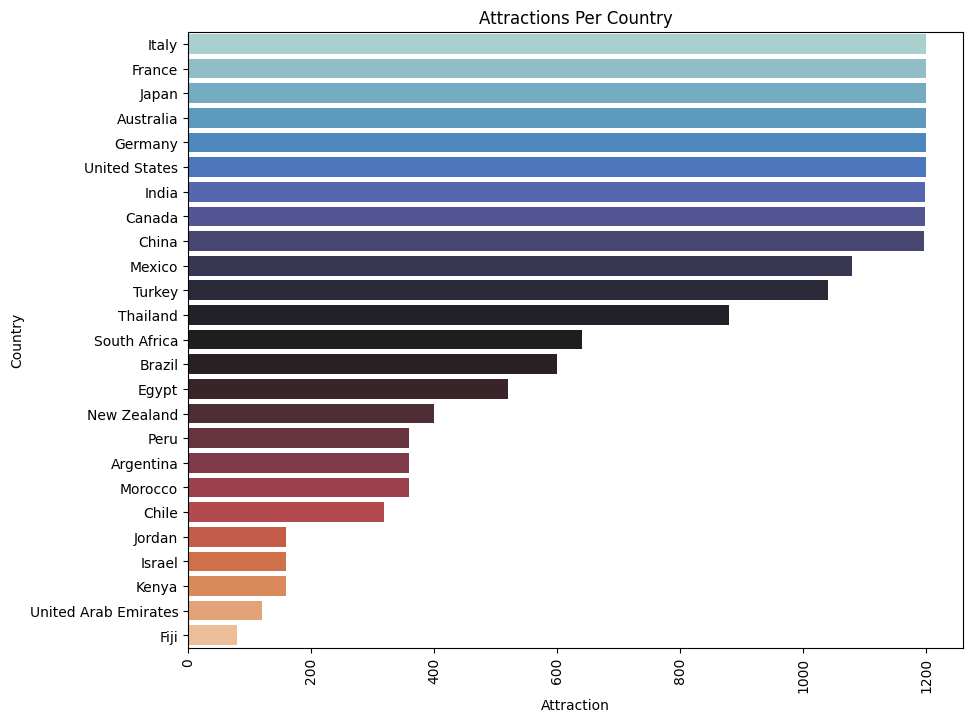

In [1142]:
# Plot the class imbalance
plt.figure(figsize=(10,8))
sns.barplot(x='Attraction', y='Country', data=sorted_countries, palette='icefire')
plt.title('Attractions Per Country')
plt.xticks(rotation=90)
plt.show()

**This will likely be an issue when modeling, so I will try to use class weights to fix this problem**

# TEXT CLEANING, PREPROCESSING, AND FURTHER EXPLORATION
- Removing punctuation and numbers
- Lowercasing everything
- Removing stopwords
- Creating a document term matrix grouped by Country
  - Count Vectorization
  - TF-IDF Vectorization
  - Bi-grams
- Creating a document term matrix grouped by Continent
  - Count Vectorization
  - TF-IDF Vectorization
  - Bi-grams
- Visualize most frequent words
  - Word clouds
  - Bar plot or histogram


In [1143]:
# Create a list of stop words
stopwords_list = stopwords.words('english')
stopwords_list+= list(string.punctuation)

In [1144]:
# Preview the list
stopwords_list[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [1145]:
# Save stopwords list for app
# joblib.dump(stopwords_list, '/Users/tiaplagata/Documents/Flatiron/capstone-project/Data/stopwords_list')

In [1146]:
# Lowercase all words in each corpus
df_to_clean = df.copy()
df_to_clean['Cleaned'] = df_to_clean['Description'].apply(lambda x: x.lower())
df_to_clean

,Attraction,Description,Country,Continent,Cleaned
0,Amboseli National Park,Amboseli belongs in the elite of Kenya’s natio...,Kenya,Africa,amboseli belongs in the elite of kenya’s natio...
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa,this 16th-century fort and unesco world herita...
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa,"occupying a plot within nairobi national park,..."
3,Nairobi National Park,Welcome to Kenya’s most accessible yet incongr...,Kenya,Africa,welcome to kenya’s most accessible yet incongr...
4,National Museum,"Kenya’s wonderful National Museum, housed in a...",Kenya,Africa,"kenya’s wonderful national museum, housed in a..."
...,...,...,...,...,...
18035,Byzantine Basilica,Near the Citadel's archaeological museum is th...,Jordan,Middle East,near the citadel's archaeological museum is th...
18036,Sharif Al Hussein Bin Ali Mosque,This grand and beautiful gleaming white mosque...,Jordan,Middle East,this grand and beautiful gleaming white mosque...
18037,North Theatre,The North Theatre is overgrown and missing muc...,Jordan,Middle East,the north theatre is overgrown and missing muc...
18038,Shops,The shells of a row of shops remain in the wes...,Jordan,Middle East,the shells of a row of shops remain in the wes...


In [1147]:
# Remove commas, hyphens, colons, and other punctuation
df_to_clean['Cleaned'] = df_to_clean['Cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df_to_clean.head()

,Attraction,Description,Country,Continent,Cleaned
0,Amboseli National Park,Amboseli belongs in the elite of Kenya’s natio...,Kenya,Africa,amboseli belongs in the elite of kenya’s natio...
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa,this 16thcentury fort and unesco world heritag...
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa,occupying a plot within nairobi national park ...
3,Nairobi National Park,Welcome to Kenya’s most accessible yet incongr...,Kenya,Africa,welcome to kenya’s most accessible yet incongr...
4,National Museum,"Kenya’s wonderful National Museum, housed in a...",Kenya,Africa,kenya’s wonderful national museum housed in an...


In [1148]:
# Use regex to get rid of numbers 
df_to_clean['Cleaned'] = df_to_clean['Cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
df_to_clean.head(10)

,Attraction,Description,Country,Continent,Cleaned
0,Amboseli National Park,Amboseli belongs in the elite of Kenya’s natio...,Kenya,Africa,amboseli belongs in the elite of kenya’s natio...
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa,this fort and unesco world heritage treasure ...
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa,occupying a plot within nairobi national park ...
3,Nairobi National Park,Welcome to Kenya’s most accessible yet incongr...,Kenya,Africa,welcome to kenya’s most accessible yet incongr...
4,National Museum,"Kenya’s wonderful National Museum, housed in a...",Kenya,Africa,kenya’s wonderful national museum housed in an...
5,Giraffe Centre,"This centre, which protects the highly endange...",Kenya,Africa,this centre which protects the highly endanger...
6,Lamu Museum,The best museum in town (and the second best i...,Kenya,Africa,the best museum in town and the second best in...
7,Galana River,Running through the heart of the park and mark...,Kenya,Africa,running through the heart of the park and mark...
8,Mzima Springs,Mzima Springs is an oasis of green in the west...,Kenya,Africa,mzima springs is an oasis of green in the west...
9,Ngulia Rhino Sanctuary,"At the base of Ngulia Hills, this 90-sq-km are...",Kenya,Africa,at the base of ngulia hills this area is surr...


In [1149]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [1150]:
# Lemmatize the text using spacy
lemmatized = spacy.load('en_core_web_sm')

df_to_clean['Lemmatized'] = df_to_clean['Cleaned'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(lemmatized(x)) if (token.is_stop==False)]))
df_to_clean.head(10)

,Attraction,Description,Country,Continent,Cleaned,Lemmatized
0,Amboseli National Park,Amboseli belongs in the elite of Kenya’s natio...,Kenya,Africa,amboseli belongs in the elite of kenya’s natio...,amboseli belong elite kenya national park easy...
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa,this fort and unesco world heritage treasure ...,fort unesco world heritage treasure mombasa ...
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa,occupying a plot within nairobi national park ...,occupy plot nairobi national park nonprofit tr...
3,Nairobi National Park,Welcome to Kenya’s most accessible yet incongr...,Kenya,Africa,welcome to kenya’s most accessible yet incongr...,welcome kenya accessible incongruous safari ex...
4,National Museum,"Kenya’s wonderful National Museum, housed in a...",Kenya,Africa,kenya’s wonderful national museum housed in an...,kenya wonderful national museum house impose b...
5,Giraffe Centre,"This centre, which protects the highly endange...",Kenya,Africa,this centre which protects the highly endanger...,centre protect highly endanger rothschild gira...
6,Lamu Museum,The best museum in town (and the second best i...,Kenya,Africa,the best museum in town and the second best in...,good museum town second good kenya house grand...
7,Galana River,Running through the heart of the park and mark...,Kenya,Africa,running through the heart of the park and mark...,run heart park mark northernmost point park vi...
8,Mzima Springs,Mzima Springs is an oasis of green in the west...,Kenya,Africa,mzima springs is an oasis of green in the west...,mzima spring oasis green west park produce inc...
9,Ngulia Rhino Sanctuary,"At the base of Ngulia Hills, this 90-sq-km are...",Kenya,Africa,at the base of ngulia hills this area is surr...,base ngulia hill area surround electric fe...


In [1151]:
# Group the corpora by Country and join them
df_to_group = df_to_clean[['Country', 'Lemmatized']]
df_grouped = df_to_group.groupby(by='Country').agg(lambda x:' '.join(x))
df_grouped

,Lemmatized
Country,
Argentina,earth dynamic accessible ice field glaciar per...
Australia,definitively sydney bondi world great beach cl...
Brazil,tijuca s leave atlantic rainforest surround ri...
Canada,canada sight banff national park justifiably r...
Chile,dub serengeti southern cone parque nacional ...
China,cablehaule funicular railway scale ascent hi...
Egypt,amunra local god karnak luxor new kingdom prin...
Fiji,coloisuva pronounce tholoeesoova oasis lush ...
France,fantastic space museum citys eastern outskirt ...


In [1152]:
# # Save grouped df
# df_grouped.to_csv('../Data/df_grouped')

## Look at different vectorization strategies
- Try different vectorization strategies and visualize them with word clouds  
  - Count Vectorization
  - TF-IDF Vectorization
  - Bi-grams

In [1153]:
# Create a document term matrix using count vectorization
# Using count vectorization (most simple way to vectorize)
cv = CountVectorizer(analyzer='word', stop_words=stopwords_list)
data = cv.fit_transform(df_grouped['Lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index = df_grouped.index
df_dtm

,aachen,aah,aalara,aalto,aaron,aaronsohn,aarti,aath,ab,abaca,...,饶平,骑楼,高北,鯉城,鸟巢,黄山,黄羊河水库,黑虎泉,黔灵山,龙潭
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
China,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
Egypt,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Fiji,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
France,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1154]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities
tfidf = TfidfVectorizer(analyzer='word', stop_words=stopwords_list)
data2 = tfidf.fit_transform(df_grouped['Lemmatized'])
df_dtm2 = pd.DataFrame(data2.toarray(), columns=tfidf.get_feature_names_out())
df_dtm2.index = df_grouped.index
df_dtm2

,aachen,aah,aalara,aalto,aaron,aaronsohn,aarti,aath,ab,abaca,...,饶平,骑楼,高北,鯉城,鸟巢,黄山,黄羊河水库,黑虎泉,黔灵山,龙潭
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Brazil,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Canada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chile,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
China,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004299,0.004299,0.004299,0.000000,0.004299,0.004299,0.004299,0.004299,0.004299,0.004299
Egypt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007706,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fiji,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
France,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Word Clouds with Count Vectorization

In [1155]:
def generate_wordcloud(data, title):
    cloud = WordCloud(width=400, height=330, max_words=150, colormap='tab20c').generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title,60)), fontsize=13)
    plt.show()

In [1156]:
# # Transposing document term matrix
# df_dtm = df_dtm.transpose()

# # Plotting word cloud for each Country
# for index, country in enumerate(df_dtm.columns):
#     generate_wordcloud(df_dtm[country].sort_values(ascending=False), country)

In [1157]:
# Look at top words with count vectorizer (in total, not per country)
sum_words = data.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq

[('museum', 2567),
 ('build', 1694),
 ('park', 1381),
 ('house', 1213),
 ('art', 1043),
 ('old', 1040),
 ('building', 992),
 ('temple', 968),
 ('city', 965),
 ('town', 962),
 ('small', 920),
 ('de', 881),
 ('large', 874),
 ('beach', 850),
 ('church', 844),
 ('century', 755),
 ('include', 752),
 ('collection', 734),
 ('south', 715),
 ('home', 694),
 ('view', 667),
 ('site', 667),
 ('north', 666),
 ('main', 637),
 ('date', 619),
 ('good', 616),
 ('centre', 589),
 ('garden', 588),
 ('history', 587),
 ('place', 569),
 ('local', 554),
 ('national', 519),
 ('world', 513),
 ('tower', 512),
 ('display', 500),
 ('island', 500),
 ('river', 489),
 ('area', 477),
 ('gallery', 477),
 ('beautiful', 476),
 ('great', 465),
 ('work', 461),
 ('village', 461),
 ('know', 456),
 ('west', 453),
 ('exhibit', 450),
 ('design', 442),
 ('road', 434),
 ('visit', 431),
 ('walk', 404),
 ('feature', 403),
 ('east', 401),
 ('lake', 400),
 ('fine', 398),
 ('end', 381),
 ('impressive', 381),
 ('hill', 381),
 ('locate'

One of the top words is 'km', short for kilometer which does not point to anything unique in a country. Others are small, large, de(Frech for of), Include, Know, like, sq, la, di, and ad. We could consider adding these to the stop words list

### Word Clouds with TF-IDF Vectorization

In [1158]:
# # Transposing document term matrix
# df_dtm2 = df_dtm2.transpose()

# # Plotting word cloud for each country
# for index, country in enumerate(df_dtm2.columns):
#     generate_wordcloud(df_dtm2[country].sort_values(ascending=False), country)

In [1159]:
# Look at top words with tf-idf vectorization (for total words, not per country)
sum_words = data2.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq

[('museum', 4.338283338806132),
 ('build', 2.847216592794639),
 ('park', 2.5753723067208036),
 ('house', 2.102425356015084),
 ('de', 2.059704840493331),
 ('art', 1.7656707773228493),
 ('building', 1.7376203154296406),
 ('small', 1.6824509665578642),
 ('city', 1.6807341150324604),
 ('old', 1.6741619719375596),
 ('temple', 1.629421021562768),
 ('town', 1.6075814968969786),
 ('beach', 1.573155156763898),
 ('church', 1.5325291672646273),
 ('large', 1.4327499375576518),
 ('south', 1.3920435015921524),
 ('include', 1.304976692761858),
 ('collection', 1.2838694455284616),
 ('home', 1.22015859675164),
 ('centre', 1.2123364635629348),
 ('site', 1.204143841691344),
 ('view', 1.2022062525767454),
 ('century', 1.2007211189321696),
 ('good', 1.1508064384968038),
 ('north', 1.1223390276849725),
 ('main', 1.1194253205862286),
 ('national', 1.0430464560375223),
 ('place', 1.0342379718543102),
 ('local', 1.0168724432030274),
 ('history', 1.012455382710214),
 ('date', 0.9968196462429081),
 ('garden', 0.

This is very similar to the top words to count vectorication, with words like km, de,include, being repeated. However, there is no much overlap since TF-IFD finds more words thata re unique to the countries, telling is that this is probably a better technique.

### Bi-Grams

In [1160]:
cv2 = CountVectorizer(analyzer='word', stop_words=stopwords_list, ngram_range=(2,2))
data3 = cv2.fit_transform(df_grouped['Lemmatized'])
df_dtm3 = pd.DataFrame(data3.toarray(), columns=cv2.get_feature_names_out())
df_dtm3.index = df_grouped.index
df_dtm3
# Transposing document term matrix
df_dtm3 = df_dtm3.transpose()
# Look at top bi-grams (in total, not per country)
sum_words = data3.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv2.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq

[('national park', 303),
 ('de la', 131),
 ('small museum', 129),
 ('museum house', 119),
 ('date century', 101),
 ('old town', 99),
 ('art museum', 95),
 ('sq km', 92),
 ('contemporary art', 86),
 ('build century', 86),
 ('museum display', 84),
 ('art gallery', 82),
 ('world heritage', 79),
 ('look like', 72),
 ('worth visit', 68),
 ('early century', 67),
 ('buddhist temple', 66),
 ('world large', 65),
 ('museum showcase', 64),
 ('originally build', 63),
 ('southern end', 63),
 ('church build', 62),
 ('guide tour', 60),
 ('old city', 58),
 ('city centre', 57),
 ('plaza de', 54),
 ('good place', 54),
 ('main road', 50),
 ('excellent museum', 49),
 ('museum feature', 49),
 ('heritage site', 49),
 ('de san', 49),
 ('northern end', 49),
 ('unesco world', 47),
 ('nature reserve', 47),
 ('bell tower', 47),
 ('city hall', 46),
 ('well know', 46),
 ('museum dedicate', 45),
 ('cultural center', 44),
 ('visitor centre', 44),
 ('city wall', 44),
 ('parque nacional', 43),
 ('beautifully restore',

This gives us a better indication of the words that we should remove since they are creating noise in the data but are commonly featured in the countries. These are:
- sq, km, south, north, west, east, de, la, southeast, northeast, northwest, look, like, southwest, de, san, and northern. Now that we have confirmation, we will add them to our stop words lists to make our data cleaner for visualizations and analysis. 

## Removing Noise from the Data

We need to remove these words that are not unique to countries.

In [1161]:
# let's add hese words to the stopwords list
stopwords_list += ['sq', 'km', 'south', 'west', 'north', 'east', 'de', 'la', 'southeast', 'northeast', 'northwest', 'look', 'like', 'southwest', 'de', 'san', 'northern']

In [1162]:
# Check whether this has worked.
cv2 = CountVectorizer(analyzer='word', stop_words=stopwords_list, ngram_range=(2,2))
data3 = cv2.fit_transform(df_grouped['Lemmatized'])
df_dtm3 = pd.DataFrame(data3.toarray(), columns=cv2.get_feature_names_out())
df_dtm3.index = df_grouped.index
df_dtm3
# Transposing document term matrix
df_dtm3 = df_dtm3.transpose()
# Look at top bi-grams (in total, not per country)
sum_words = data3.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv2.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

words_freq

[('national park', 303),
 ('small museum', 129),
 ('museum house', 119),
 ('date century', 101),
 ('old town', 99),
 ('art museum', 95),
 ('contemporary art', 86),
 ('build century', 86),
 ('museum display', 84),
 ('art gallery', 82),
 ('world heritage', 79),
 ('worth visit', 68),
 ('early century', 67),
 ('buddhist temple', 66),
 ('world large', 65),
 ('museum showcase', 64),
 ('originally build', 63),
 ('southern end', 63),
 ('church build', 62),
 ('guide tour', 60),
 ('old city', 58),
 ('city centre', 57),
 ('good place', 54),
 ('main road', 50),
 ('excellent museum', 49),
 ('museum feature', 49),
 ('heritage site', 49),
 ('unesco world', 47),
 ('nature reserve', 47),
 ('bell tower', 47),
 ('city hall', 46),
 ('well know', 46),
 ('museum dedicate', 45),
 ('cultural center', 44),
 ('visitor centre', 44),
 ('city wall', 44),
 ('parque nacional', 43),
 ('beautifully restore', 43),
 ('late century', 42),
 ('cultural centre', 42),
 ('botanical garden', 42),
 ('clock tower', 41),
 ('littl

In [1163]:
df.head()

,Attraction,Description,Country,Continent
0,Amboseli National Park,Amboseli belongs in the elite of Kenya’s natio...,Kenya,Africa
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa
3,Nairobi National Park,Welcome to Kenya’s most accessible yet incongr...,Kenya,Africa
4,National Museum,"Kenya’s wonderful National Museum, housed in a...",Kenya,Africa


### Functions To Make Preprocessing Easier

In [1164]:
def preprocess_df(df, column, preview=True, lemmatize=True):
    """
    Input df with raw text descriptions.
    Return df with preprocessed text.
    If preview=True, returns a preview of the new df.
    """
    

    df[column] = df['Description'].apply(lambda x: x.lower())
    df[column] = df[column].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
    df[column] = df[column].apply(lambda x: re.sub('\w*\d\w*','', x))
    

    if lemmatize:
        df[column]= df[column].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(lemmatized(x)) if (token.is_stop==False)]))
    

    if preview:
        display(df.head(10))
        
    return df

In [1165]:
def group_text_per_country(df, column):
    """
    Groups the preprocessed text per country.
    """
    df_to_group = df[['Country', column]]
    df_grouped = df_to_group.groupby(by='Country').agg(lambda x:' '.join(x))
    return df_grouped

In [1166]:
def create_doc_term_matrix(df, column, count_vec=True, ngram_range=(1,1)):
    """
    Creates a document term matrix.
    Defaults to count vectorizer with optional n-gram param.
    If count_vec==False, uses a TF-IDF vectorizer.
    """
    df_grouped = group_text_per_country(df, column)
    
    if count_vec:
        vec = CountVectorizer(analyzer='word', stop_words=stopwords_list, ngram_range=ngram_range)
    else:
        vec = TfidfVectorizer(analyzer='word', stop_words=stopwords_list)
    
    data = vec.fit_transform(df_grouped[column])
    df_dtm = pd.DataFrame(data.toarray(), columns=vec.get_feature_names_out())
    df_dtm.index = df_grouped.index
    return df_dtm.transpose()

In [1168]:
preprocessed_df = preprocess_df(df, 'Lemmatized')
preprocessed_df


,Attraction,Description,Country,Continent,Lemmatized
0,Amboseli National Park,Amboseli belongs in the elite of Kenya’s natio...,Kenya,Africa,amboseli belong elite kenya national park easy...
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa,fort unesco world heritage treasure mombasa ...
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa,occupy plot nairobi national park nonprofit tr...
3,Nairobi National Park,Welcome to Kenya’s most accessible yet incongr...,Kenya,Africa,welcome kenya accessible incongruous safari ex...
4,National Museum,"Kenya’s wonderful National Museum, housed in a...",Kenya,Africa,kenya wonderful national museum house impose b...
5,Giraffe Centre,"This centre, which protects the highly endange...",Kenya,Africa,centre protect highly endanger rothschild gira...
6,Lamu Museum,The best museum in town (and the second best i...,Kenya,Africa,good museum town second good kenya house grand...
7,Galana River,Running through the heart of the park and mark...,Kenya,Africa,run heart park mark northernmost point park vi...
8,Mzima Springs,Mzima Springs is an oasis of green in the west...,Kenya,Africa,mzima spring oasis green west park produce inc...
9,Ngulia Rhino Sanctuary,"At the base of Ngulia Hills, this 90-sq-km are...",Kenya,Africa,base ngulia hill area surround electric fe...


,Attraction,Description,Country,Continent,Lemmatized
0,Amboseli National Park,Amboseli belongs in the elite of Kenya’s natio...,Kenya,Africa,amboseli belong elite kenya national park easy...
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa,fort unesco world heritage treasure mombasa ...
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa,occupy plot nairobi national park nonprofit tr...
3,Nairobi National Park,Welcome to Kenya’s most accessible yet incongr...,Kenya,Africa,welcome kenya accessible incongruous safari ex...
4,National Museum,"Kenya’s wonderful National Museum, housed in a...",Kenya,Africa,kenya wonderful national museum house impose b...
...,...,...,...,...,...
18035,Byzantine Basilica,Near the Citadel's archaeological museum is th...,Jordan,Middle East,near citadels archaeological museum small byza...
18036,Sharif Al Hussein Bin Ali Mosque,This grand and beautiful gleaming white mosque...,Jordan,Middle East,grand beautiful gleam white mosque – icon aqab...
18037,North Theatre,The North Theatre is overgrown and missing muc...,Jordan,Middle East,north theatre overgrown miss original blackbas...
18038,Shops,The shells of a row of shops remain in the wes...,Jordan,Middle East,shell row shop remain western section colonnad...


# VISUALIZATIONS FOR ALL COUNTRIES

In [1169]:
# Top Words After All the Preprocessing Steps (In total for all the countries)
sum_words = data.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq

[('museum', 2567),
 ('build', 1694),
 ('park', 1381),
 ('house', 1213),
 ('art', 1043),
 ('old', 1040),
 ('building', 992),
 ('temple', 968),
 ('city', 965),
 ('town', 962),
 ('small', 920),
 ('de', 881),
 ('large', 874),
 ('beach', 850),
 ('church', 844),
 ('century', 755),
 ('include', 752),
 ('collection', 734),
 ('south', 715),
 ('home', 694),
 ('view', 667),
 ('site', 667),
 ('north', 666),
 ('main', 637),
 ('date', 619),
 ('good', 616),
 ('centre', 589),
 ('garden', 588),
 ('history', 587),
 ('place', 569),
 ('local', 554),
 ('national', 519),
 ('world', 513),
 ('tower', 512),
 ('display', 500),
 ('island', 500),
 ('river', 489),
 ('area', 477),
 ('gallery', 477),
 ('beautiful', 476),
 ('great', 465),
 ('work', 461),
 ('village', 461),
 ('know', 456),
 ('west', 453),
 ('exhibit', 450),
 ('design', 442),
 ('road', 434),
 ('visit', 431),
 ('walk', 404),
 ('feature', 403),
 ('east', 401),
 ('lake', 400),
 ('fine', 398),
 ('end', 381),
 ('impressive', 381),
 ('hill', 381),
 ('locate'

## Top Words for All The Countries

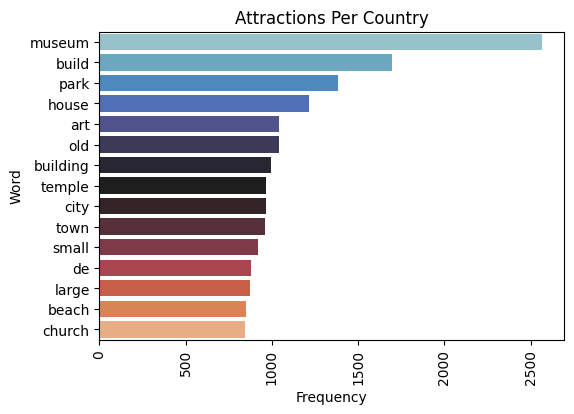

In [1170]:
# Plot the 15 top words in total
words_freq_df = pd.DataFrame(words_freq[:15], columns=['Word', 'Frequency'])
words_freq_df

plt.figure(figsize=(6,4))
sns.barplot(x='Frequency', y='Word', data=words_freq_df, palette='icefire')
plt.title('Attractions Per Country')
plt.xticks(rotation=90)
plt.show()

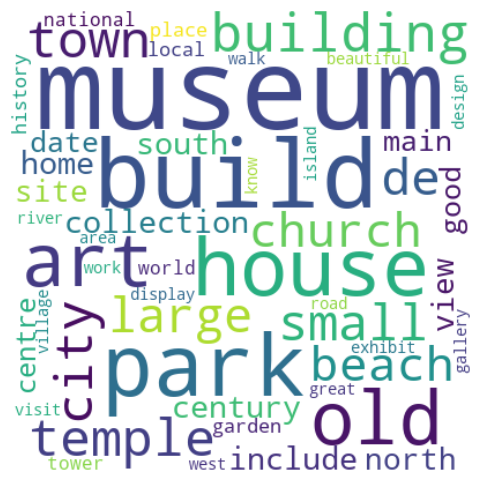

In [1171]:
# Word Cloud for Top 15 words in Total
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert word frequencies into a dictionary
word_freq_dict = dict(words_freq)

# Generate the word cloud
wordcloud = WordCloud(width=400, height=400, max_words=50, colormap='viridis', contour_width=1, contour_color='steelblue', background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Top Bi-Grams For All the Countries

In [1172]:
# Top Bi-Grams for All the Countries 
cv3 = CountVectorizer(analyzer='word', stop_words=stopwords_list, ngram_range=(2,2))
df_grouped = group_text_per_country(preprocessed_df, 'Lemmatized')
data4 = cv3.fit_transform(df_grouped['Lemmatized'])
df_dtm4 = pd.DataFrame(data4.toarray(), columns=cv3.get_feature_names_out())
df_dtm4.index = df_grouped.index
df_dtm4
# Transposing document term matrix
df_dtm4 = df_dtm4.transpose()
# Look at top bi-grams (in total, not per country)
sum_words = data4.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv3.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq

[('national park', 303),
 ('small museum', 129),
 ('museum house', 119),
 ('date century', 101),
 ('old town', 99),
 ('art museum', 95),
 ('contemporary art', 86),
 ('build century', 86),
 ('museum display', 84),
 ('art gallery', 82),
 ('world heritage', 79),
 ('worth visit', 68),
 ('early century', 67),
 ('buddhist temple', 66),
 ('world large', 65),
 ('museum showcase', 64),
 ('originally build', 63),
 ('southern end', 63),
 ('church build', 62),
 ('guide tour', 60),
 ('old city', 58),
 ('city centre', 57),
 ('good place', 54),
 ('main road', 50),
 ('excellent museum', 49),
 ('museum feature', 49),
 ('heritage site', 49),
 ('unesco world', 47),
 ('nature reserve', 47),
 ('bell tower', 47),
 ('city hall', 46),
 ('well know', 46),
 ('museum dedicate', 45),
 ('cultural center', 44),
 ('visitor centre', 44),
 ('city wall', 44),
 ('parque nacional', 43),
 ('beautifully restore', 43),
 ('late century', 42),
 ('cultural centre', 42),
 ('botanical garden', 42),
 ('clock tower', 41),
 ('littl

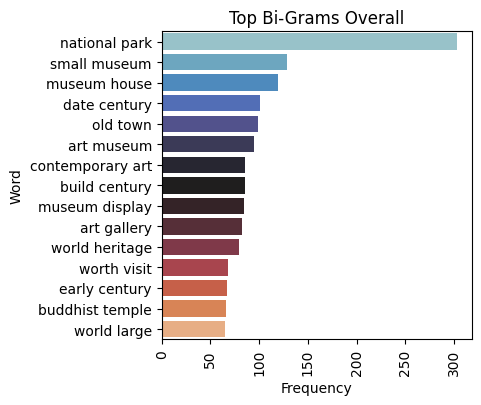

In [1173]:
# Plot the 15 top Bi-Grams in total
words_freq_bi_df = pd.DataFrame(words_freq[:15], columns=['Word', 'Frequency'])
words_freq_bi_df

plt.figure(figsize=(4,4))
sns.barplot(x='Frequency', y='Word', data=words_freq_bi_df, palette='icefire')
plt.title('Top Bi-Grams Overall')
plt.xticks(rotation=90)
plt.show()

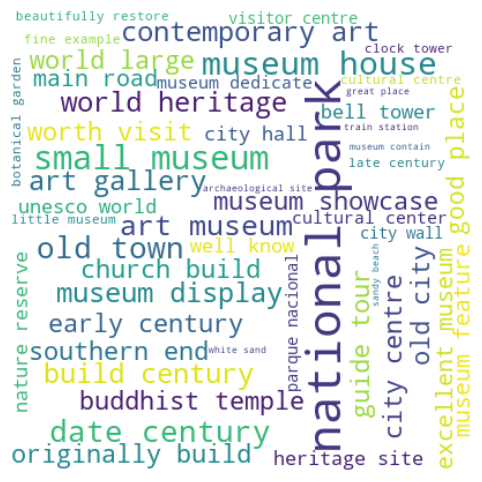

In [1174]:
# Word Cloud for Top 15 BI-Grams in Total
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert word frequencies into a dictionary
word_freq_dict = dict(words_freq)

# Generate the word cloud
wordcloud = WordCloud(width=400, max_words=50, height=400, colormap='viridis', contour_width=1, contour_color='steelblue', background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Top Tri-Grams for All Countries

In [1175]:
# Top Tri-Grams for All the Countries 
cv4 = CountVectorizer(analyzer='word', stop_words=stopwords_list, ngram_range=(3,3))
df_grouped = group_text_per_country(preprocessed_df, 'Lemmatized')
data5 = cv4.fit_transform(df_grouped['Lemmatized'])
df_dtm5 = pd.DataFrame(data5.toarray(), columns=cv4.get_feature_names_out())
df_dtm5.index = df_grouped.index
df_dtm5
# Transposing document term matrix
df_dtm5 = df_dtm5.transpose()
# Look at top tri-grams (in total, not per country)
sum_words = data5.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv4.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq

[('world heritage site', 47),
 ('unesco world heritage', 46),
 ('national historic site', 21),
 ('museum tell story', 20),
 ('world heritage list', 18),
 ('final resting place', 16),
 ('national park cover', 15),
 ('date early century', 14),
 ('traditional ornately decorate', 12),
 ('ornately decorate residence', 12),
 ('world large collection', 11),
 ('museum worth visit', 11),
 ('large national park', 10),
 ('art gallery house', 10),
 ('haveli traditional ornately', 10),
 ('build late century', 9),
 ('work local artist', 9),
 ('buddhist temple complex', 9),
 ('date late century', 9),
 ('build century ad', 9),
 ('greek orthodox church', 9),
 ('modern contemporary art', 8),
 ('natural history museum', 8),
 ('stretch white sand', 8),
 ('million year old', 8),
 ('date century bc', 8),
 ('frank lloyd wright', 8),
 ('marine national park', 8),
 ('sultan murat ii', 8),
 ('museum trace history', 7),
 ('fine art museum', 7),
 ('art include work', 7),
 ('renovation time research', 7),
 ('conte

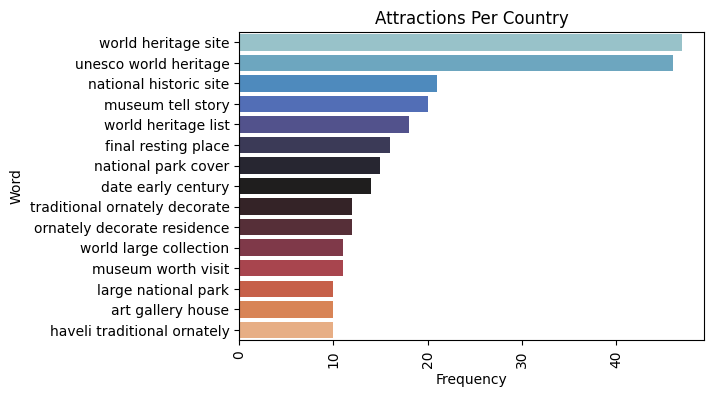

In [1176]:
# Plot the 15 top Tri-Grams in total
words_freq_tri_df = pd.DataFrame(words_freq[:15], columns=['Word', 'Frequency'])
words_freq_tri_df

plt.figure(figsize=(6,4))
sns.barplot(x='Frequency', y='Word', data=words_freq_tri_df, palette='icefire')
plt.title('Attractions Per Country')
plt.xticks(rotation=90)
plt.show()

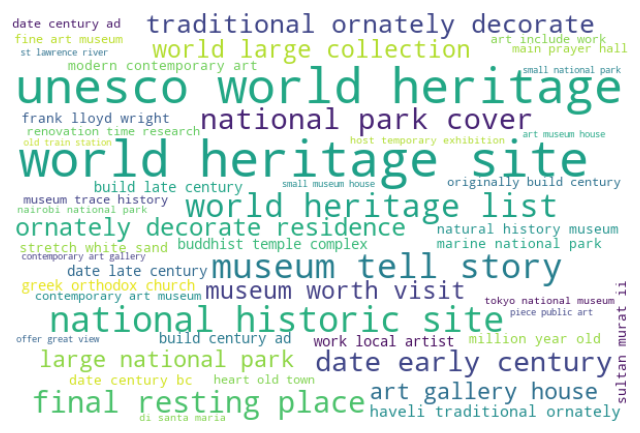

In [1177]:
# Word Cloud for Top 15 Tri-Grams in Total
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert word frequencies into a dictionary
word_freq_dict = dict(words_freq)

# Generate the word cloud
wordcloud = WordCloud(width=600, max_words=50, height=400, colormap='viridis', contour_width=1, contour_color='steelblue', background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# VISUALIZATIONS FOR KENYA

In [1178]:
# Creating a DF for Kenya only 
kenya_df = preprocessed_df[preprocessed_df['Country'] == 'Kenya']
kenya_df

,Attraction,Description,Country,Continent,Lemmatized
0,Amboseli National Park,Amboseli belongs in the elite of Kenya’s natio...,Kenya,Africa,amboseli belong elite kenya national park easy...
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa,fort unesco world heritage treasure mombasa ...
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa,occupy plot nairobi national park nonprofit tr...
3,Nairobi National Park,Welcome to Kenya’s most accessible yet incongr...,Kenya,Africa,welcome kenya accessible incongruous safari ex...
4,National Museum,"Kenya’s wonderful National Museum, housed in a...",Kenya,Africa,kenya wonderful national museum house impose b...
...,...,...,...,...,...
155,Malindi Museum,"Part of the Malindi Historic Circuit, this mod...",Kenya,Africa,malindi historic circuit moderately interestin...
156,Lake Oloiden,"Lake Naivasha may be a freshwater lake, but it...",Kenya,Africa,lake naivasha freshwater lake alkaline water n...
157,Portuguese Church,This thatched-roofed church gets its name beca...,Kenya,Africa,thatchedroofe church get portuguese explorer v...
158,Lamu Market,"Atmospheric and somewhat chaotic, this quintes...",Kenya,Africa,atmospheric somewhat chaotic quintessential la...


In [1179]:

data_kenya = cv.fit_transform(kenya_df['Lemmatized'])

In [1180]:
print("Shape of data_kenya:", data_kenya.shape)
print("Size of cv.vocabulary_:", len(cv.vocabulary_))

Shape of data_kenya: (160, 1134)
Size of cv.vocabulary_: 1134


In [1181]:
# Sum word occurrences across all rows
sum_words_kenya = data_kenya.sum(axis=0)

# Extract word frequencies
words_freq_kenya = [(word, sum_words_kenya[0, idx]) for word, idx in cv.vocabulary_.items()]

# Sort by frequency in descending order
words_freq_kenya = sorted(words_freq_kenya, key=lambda x: x[1], reverse=True)

# Display the result
words_freq_kenya

[('park', 43),
 ('national', 27),
 ('kenya', 19),
 ('hill', 19),
 ('lake', 19),
 ('nairobi', 16),
 ('house', 12),
 ('good', 12),
 ('place', 12),
 ('visit', 11),
 ('area', 11),
 ('forest', 11),
 ('reserve', 10),
 ('view', 10),
 ('museum', 9),
 ('green', 9),
 ('island', 9),
 ('gate', 9),
 ('elephant', 9),
 ('sanctuary', 9),
 ('wildlife', 9),
 ('world', 8),
 ('site', 8),
 ('town', 8),
 ('tsavo', 8),
 ('natural', 8),
 ('walk', 8),
 ('village', 8),
 ('centre', 7),
 ('swahili', 7),
 ('beach', 7),
 ('take', 7),
 ('small', 7),
 ('road', 7),
 ('include', 7),
 ('fall', 7),
 ('old', 7),
 ('end', 7),
 ('amboseli', 6),
 ('southern', 6),
 ('outside', 6),
 ('large', 6),
 ('cover', 6),
 ('valley', 6),
 ('local', 6),
 ('private', 6),
 ('art', 6),
 ('main', 6),
 ('city', 5),
 ('ground', 5),
 ('river', 5),
 ('spring', 5),
 ('africa', 5),
 ('marine', 5),
 ('wide', 5),
 ('spot', 5),
 ('lovely', 5),
 ('home', 5),
 ('near', 5),
 ('open', 5),
 ('ruin', 5),
 ('kenyan', 5),
 ('tower', 5),
 ('collection', 5),
 (

## Top Words for Kenya

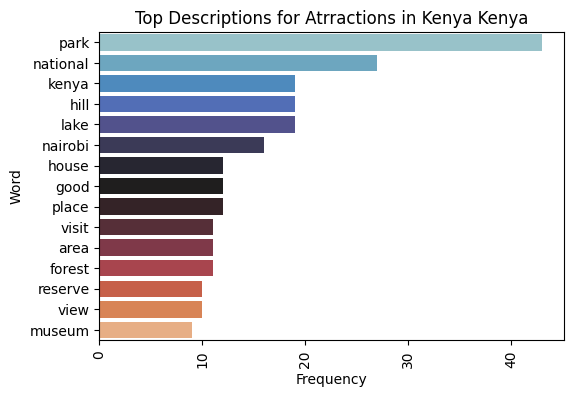

In [1182]:
# Plot the 15 top words in total for Kenya
words_freq_df_kenya = pd.DataFrame(words_freq_kenya[:15], columns=['Word', 'Frequency'])

plt.figure(figsize=(6,4))
sns.barplot(x='Frequency', y='Word', data=words_freq_df_kenya, palette='icefire')
plt.title('Top Descriptions for Atrractions in Kenya Kenya')
plt.xticks(rotation=90)
plt.show()

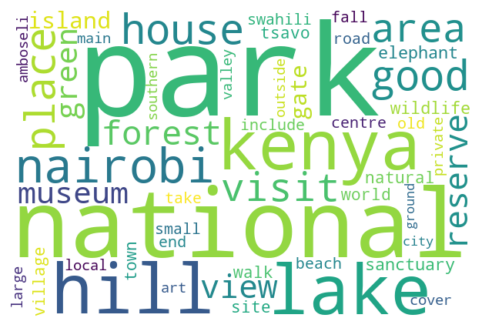

In [1183]:
# Word Cloud for Top 15 Words in Kenya
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert word frequencies into a dictionary
word_freq_dict = dict(words_freq_kenya)

# Generate the word cloud
wordcloud = WordCloud(width=600, max_words=50, height=400, colormap='viridis', contour_width=1, contour_color='steelblue', background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Top Bi-Grams for Kenya

In [1184]:
# Top Bi-Grams for Kenya

cv_Kenya_bi = CountVectorizer(analyzer='word', stop_words=stopwords_list, ngram_range=(2,2))
kenya_grouped = group_text_per_country(kenya_df, 'Lemmatized')
data_kenya_bi = cv_Kenya_bi.fit_transform(kenya_df['Lemmatized'])
df_dtm_kenya = pd.DataFrame(data_kenya_bi.toarray(), columns=cv_Kenya_bi.get_feature_names_out())


# # Transposing document term matrix
df_dtm_kenya = df_dtm_kenya.transpose()
# # Look at top bi-grams 
sum_words_bi = data_kenya_bi.sum(axis=0)
words_freq_bi = [(word, sum_words_bi[0, idx]) for word, idx in cv_Kenya_bi.vocabulary_.items()]
words_freq_bi = sorted(words_freq_bi, key=lambda x: x[1], reverse=True)
words_freq_bi


[('national park', 18),
 ('nairobi national', 7),
 ('national reserve', 6),
 ('white sand', 4),
 ('world heritage', 3),
 ('voi gate', 3),
 ('wildlife sanctuary', 3),
 ('taita hill', 3),
 ('good place', 3),
 ('lake turkana', 3),
 ('park easy', 2),
 ('unesco world', 2),
 ('national museum', 2),
 ('rothschild giraffe', 2),
 ('run heart', 2),
 ('heart park', 2),
 ('galana river', 2),
 ('kenya large', 2),
 ('large national', 2),
 ('park cover', 2),
 ('karen blixen', 2),
 ('marine park', 2),
 ('marine national', 2),
 ('beach wide', 2),
 ('sanctuary good', 2),
 ('local people', 2),
 ('swahili ruin', 2),
 ('kenyan coast', 2),
 ('tsavo national', 2),
 ('shetani lava', 2),
 ('lava flow', 2),
 ('flow shetani', 2),
 ('walk park', 2),
 ('kakamega forest', 2),
 ('rift valley', 2),
 ('lake magadi', 2),
 ('fivehour return', 2),
 ('return hike', 2),
 ('hike lirhanda', 2),
 ('lirhanda hill', 2),
 ('hill place', 2),
 ('park kenya', 2),
 ('mt longonot', 2),
 ('heritage site', 2),
 ('southern end', 2),
 ('

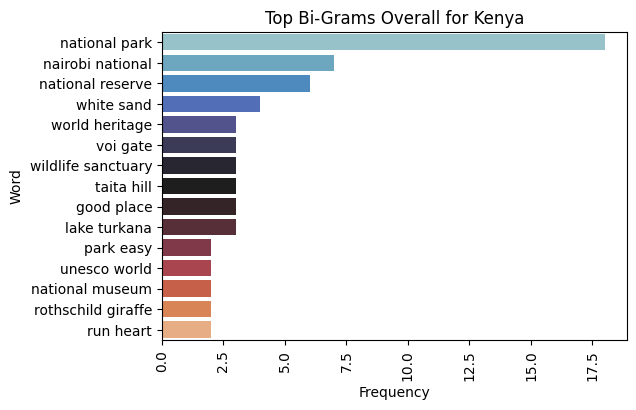

In [1185]:
# Plot the 15 top Bi-Grams in total for Kenya
words_freq_bi_df_kenya = pd.DataFrame(words_freq_bi[:15], columns=['Word', 'Frequency'])
words_freq_bi_df_kenya

plt.figure(figsize=(6,4))
sns.barplot(x='Frequency', y='Word', data=words_freq_bi_df_kenya, palette='icefire')
plt.title('Top Bi-Grams Overall for Kenya')
plt.xticks(rotation=90)
plt.show()

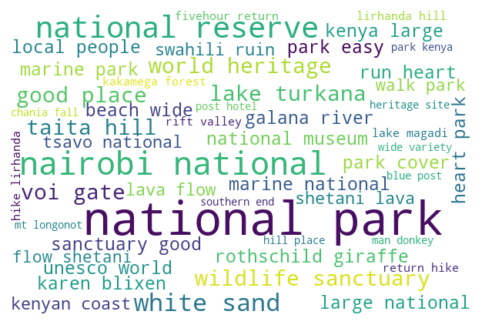

In [1186]:
# Word Cloud for Top 15 Bi-grams in Kenya
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert word frequencies into a dictionary
word_freq_dict = dict(words_freq_bi)

# Generate the word cloud
wordcloud = WordCloud(width=600, max_words=50, height=400, colormap='viridis', contour_width=1, contour_color='steelblue', background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Top Tri-Grams for Kenya

In [1187]:
# Top Tri-Grams for Kenya


cv_Kenya_tri = CountVectorizer(analyzer='word', stop_words=stopwords_list, ngram_range=(3,3))
kenya_grouped = group_text_per_country(kenya_df, 'Lemmatized')
data_kenya_tri = cv_Kenya_tri.fit_transform(kenya_df['Lemmatized'])
df_dtm_kenya_tri = pd.DataFrame(data_kenya_tri.toarray(), columns=cv_Kenya_tri.get_feature_names_out())


# # Transposing document term matrix
df_dtm_kenya_tri = df_dtm_kenya_tri.transpose()
# # Look at top bi-grams 
sum_words_tri = data_kenya_tri.sum(axis=0)
words_freq_tri = [(word, sum_words_tri[0, idx]) for word, idx in cv_Kenya_tri.vocabulary_.items()]
words_freq_tri = sorted(words_freq_tri, key=lambda x: x[1], reverse=True)
words_freq_tri


[('nairobi national park', 7),
 ('unesco world heritage', 2),
 ('run heart park', 2),
 ('kenya large national', 2),
 ('large national park', 2),
 ('tsavo national park', 2),
 ('shetani lava flow', 2),
 ('lava flow shetani', 2),
 ('fivehour return hike', 2),
 ('return hike lirhanda', 2),
 ('hike lirhanda hill', 2),
 ('world heritage site', 2),
 ('blue post hotel', 2),
 ('portuguese explorer vasco', 2),
 ('explorer vasco da', 2),
 ('vasco da gama', 2),
 ('samburu national reserve', 2),
 ('amboseli belong elite', 1),
 ('belong elite kenya', 1),
 ('elite kenya national', 1),
 ('kenya national park', 1),
 ('national park easy', 1),
 ('park easy signature', 1),
 ('easy signature attraction', 1),
 ('signature attraction sight', 1),
 ('attraction sight hundred', 1),
 ('sight hundred bigtuske', 1),
 ('fort unesco world', 1),
 ('world heritage treasure', 1),
 ('heritage treasure mombasa', 1),
 ('treasure mombasa visit', 1),
 ('mombasa visit site', 1),
 ('visit site metrethick', 1),
 ('site metre

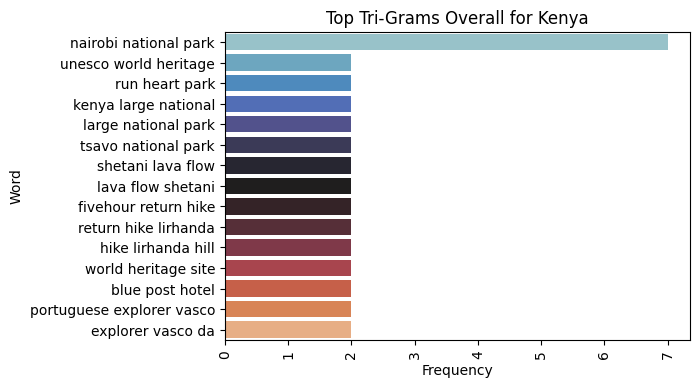

In [1188]:
# Plot the 15 top Tri-Grams in total for Kenya
words_freq_tri_df_kenya = pd.DataFrame(words_freq_tri[:15], columns=['Word', 'Frequency'])
words_freq_tri_df_kenya

plt.figure(figsize=(6,4))
sns.barplot(x='Frequency', y='Word', data=words_freq_tri_df_kenya, palette='icefire')
plt.title('Top Tri-Grams Overall for Kenya')
plt.xticks(rotation=90)
plt.show()

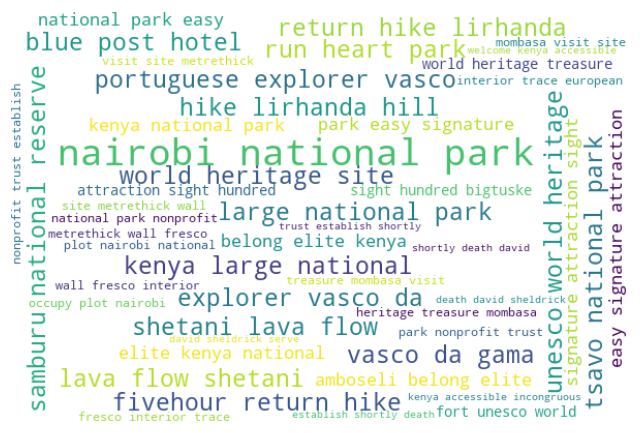

In [1189]:
# Word Cloud for Top 15 Tri-grams in Kenya
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert word frequencies into a dictionary
word_freq_dict = dict(words_freq_tri)

# Generate the word cloud
wordcloud = WordCloud(width=600, max_words=50, height=400, colormap='viridis', contour_width=1, contour_color='steelblue', background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# EDA Conclusions and Recommendations

# MODELING

In [1190]:
# Re-import the data to get a fresh start
data = pd.read_csv('/Users//rosew/Downloads/best_travel_destinations_for_2025_df_cleaned.csv', index_col=0)
data.head()

,Attraction,Description,Country,Continent
0,Amboseli National Park,Amboseli belongs in the elite of Kenya’s natio...,Kenya,Africa
1,Fort Jesus,This 16th-century fort and Unesco World Herita...,Kenya,Africa
2,David Sheldrick Wildlife Trust,"Occupying a plot within Nairobi National Park,...",Kenya,Africa
3,Nairobi National Park,Welcome to Kenya’s most accessible yet incongr...,Kenya,Africa
4,National Museum,"Kenya’s wonderful National Museum, housed in a...",Kenya,Africa


## Preprocessing and Train Test Split

In [1191]:
# Perform train-test split before cleaning.preprocessing
X = data['Description']
y= data['Country']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((14424,), (3607,))

In [1192]:
# Since this is a series, it will need to be changed to a DF for preprocessing
X_train

119      A watering hole that attracts animals, includi...
9709     This museum offers a good overview of the natu...
11414    Formed as early as 1977 from a desire to prese...
4584     One of the few nature sanctuaries within day-t...
12856    This small plantation, which produces almost-o...
                               ...                        
11290    Built in the 1840s, this shimmering tin-topped...
11972    In 1916 brothers Oscar and Marius Dufresne com...
5396     Ao Wai is a lovely beach far removed from ever...
860      Amenemhat was a 12th-dynasty governor of Oryx....
15804    About 3km south of Peppermint Bay is this top ...
Name: Description, Length: 14424, dtype: object

In [1193]:
X_train_preprocessed = preprocess_df(pd.DataFrame(X_train, columns = ['Description']), 'Lemmatized')
X_test_preprocessed = preprocess_df(pd.DataFrame(X_test,  columns =['Description']), 'Lemmatized')


,Description,Lemmatized
119,"A watering hole that attracts animals, includi...",watering hole attract animal include elephant ...
9709,This museum offers a good overview of the natu...,museum offer good overview natural cultural hi...
11414,Formed as early as 1977 from a desire to prese...,form early desire preserve memory story poss...
4584,One of the few nature sanctuaries within day-t...,nature sanctuary daytrip reach mumbais city li...
12856,"This small plantation, which produces almost-o...",small plantation produce almostorganic shadegr...
4622,A few partially rebuilt wall stubs are all tha...,partially rebuild wall stub remain palace comp...
16990,The Roman harbour at the base of Kaleiçi's slo...,roman harbour base kaleiçis slope antalyas lif...
9767,Was it the fall of 1966 or the winter of ’67? ...,fall winter ' haight saying go remember summ...
12534,Staff at the visitors center of the stunning C...,staff visitor center stunning chipinque park o...
4282,The International Society for Krishna Consciou...,international society krishna consciousness ww...


,Description,Lemmatized
15937,"About 5km south of Cooktown, this 47-hectare w...",south cooktown wetland favourite birdwatch...
7759,Nero had his Domus Aurea constructed after the...,nero domus aurea construct fire ad rumour st...
7950,"A popular diving destination, these protected ...",popular diving destination protect water res...
1020,At the perennially popular Gardens there are a...,perennially popular garden actually site near ...
2864,Exhibits in this museum include the crown and ...,exhibit museum include crown personal item dai...
4463,"Isa Khan was a noble of the Sher Shah era, and...",isa khan noble sher shah era grandiose afghans...
17248,Old cars and horse-drawn carts are housed in t...,old car horsedrawn cart house silk factory gar...
1870,The Five Mountains of Aso are the smaller moun...,mountain aso small mountain asosan caldera out...
5365,Standing 14m high and weighing in at 30 tonnes...,stand high weigh tonne beautiful bronze st...
15321,Family-owned winery producing award-winning ri...,familyowne winery produce awardwinne riesle sh...


In [ ]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['sq', 'km', 'one','two', 'south', 'west', 'north', 'east', 'de', 'la', 'southeast', 'northeast', 'northwest', 'look', 'like', 'southwest', 'de', 'san', 'northern']



In [1195]:
# Vectorize the text data to be suitable for modeling
vectorizer = TfidfVectorizer(analyzer='word', stop_words=stopwords_list, decode_error='ignore')
# vectorizer = TfidfVectorizer(analyzer='word')
X_train_tfidf = vectorizer.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_tfidf = vectorizer.transform(X_test_preprocessed['Lemmatized'])

In [1196]:
%store X_train_tfidf
%store X_test_tfidf

Stored 'X_train_tfidf' (csr_matrix)
Stored 'X_test_tfidf' (csr_matrix)


In [1197]:
sum_words22 = X_train_tfidf.sum(axis=0)
words_freq22 = [(word, sum_words22[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq22 = sorted(words_freq22, key=lambda x: x[1], reverse=True)
words_freq22

[('museum', 252.8432116258323),
 ('build', 190.1922817063354),
 ('park', 158.8981356726548),
 ('house', 148.1750203906542),
 ('art', 134.34150618824452),
 ('temple', 131.50997044239247),
 ('old', 131.14535398619532),
 ('building', 129.78690751381052),
 ('town', 125.75132115133795),
 ('city', 125.18138631404456),
 ('small', 119.37892344598552),
 ('church', 118.39815687069644),
 ('large', 113.98840618682125),
 ('beach', 112.16189431286651),
 ('century', 108.56161330941602),
 ('collection', 102.37901726407925),
 ('include', 98.9598878896615),
 ('view', 94.66637520682858),
 ('site', 94.50260544623806),
 ('home', 92.00769150367357),
 ('date', 91.70677732985625),
 ('main', 91.45364639453696),
 ('good', 88.3335063777753),
 ('history', 86.47413626839558),
 ('garden', 84.87923225077881),
 ('centre', 82.33713925760625),
 ('place', 81.95654029538758),
 ('local', 79.38509109105297),
 ('tower', 76.0866955751732),
 ('island', 75.18929511698275),
 ('display', 75.09085624163968),
 ('national', 74.5411

In [1199]:
def evaluate_model(model, X_train, X_test):
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)

    print('Training Accuracy:', accuracy_score(y_train, y_preds_train))
    print('Testing Accuracy:', accuracy_score(y_test, y_preds_test))
    print("Train and Test Accuracy Difference:", accuracy_score(y_train, y_preds_train)-accuracy_score(y_test, y_preds_test))
    print('\n---------------\n')
    print('Training F1:', f1_score(y_train, y_preds_train, average='weighted'))
    print('Testing F1:', f1_score(y_test, y_preds_test, average='weighted'))
    print('\n---------------\n')
    print(classification_report(y_test, y_preds_test))

# 1. MULTINOMIAL NAIVE BAYES MODEL(MNB)

## MNB Iteration One

In [1200]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [1201]:
nb.classes_

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'Chile', 'China',
       'Egypt', 'Fiji', 'France', 'Germany', 'India', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kenya', 'Mexico', 'Morocco', 'New Zealand',
       'Peru', 'South Africa', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United States'], dtype='<U20')

In [1202]:
evaluate_model(nb, X_train_tfidf, X_test_tfidf)

Training Accuracy: 0.7425124792013311
Testing Accuracy: 0.5234266703631827
Train and Test Accuracy Difference: 0.21908580883814843

---------------

Training F1: 0.6812673313389652
Testing F1: 0.4754250157939932

---------------

                      precision    recall  f1-score   support

           Argentina       0.00      0.00      0.00        73
           Australia       0.38      0.71      0.49       252
              Brazil       1.00      0.09      0.17       127
              Canada       0.37      0.63      0.47       241
               Chile       0.00      0.00      0.00        60
               China       0.52      0.67      0.59       249
               Egypt       0.94      0.16      0.28       104
                Fiji       0.00      0.00      0.00        15
              France       0.62      0.60      0.61       245
             Germany       0.66      0.68      0.67       252
               India       0.65      0.64      0.64       255
              Israel     

## MNB Iteration Two- Using Count Vectorizer

In [1203]:
# Trying Count Vectorizer to see the difference
# Vectorize the text data to be suitable for modeling
vectorizer_cv = CountVectorizer(analyzer='word', stop_words=stopwords_list, decode_error='ignore')
X_train_cv = vectorizer_cv.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_cv = vectorizer_cv.transform(X_test_preprocessed['Lemmatized'])

nb = MultinomialNB()
nb.fit(X_train_cv, y_train)
evaluate_model(nb, X_train_cv, X_test_cv)


Training Accuracy: 0.8264004437049363
Testing Accuracy: 0.5389520377044635
Train and Test Accuracy Difference: 0.2874484060004727

---------------

Training F1: 0.8097368278257866
Testing F1: 0.5072964114748401

---------------

                      precision    recall  f1-score   support

           Argentina       1.00      0.03      0.05        73
           Australia       0.40      0.71      0.51       252
              Brazil       0.93      0.31      0.46       127
              Canada       0.39      0.62      0.48       241
               Chile       1.00      0.05      0.10        60
               China       0.53      0.65      0.59       249
               Egypt       0.89      0.46      0.61       104
                Fiji       0.00      0.00      0.00        15
              France       0.62      0.58      0.60       245
             Germany       0.63      0.65      0.64       252
               India       0.64      0.60      0.62       255
              Israel      

This is much more overfit, so we can keep working with TF-IDF Vectorization

## MNB Iteration Three- Using Class Weights to Improve Class Imbalance

In [1204]:
# Using Class Weights to improve class imbalance

In [1205]:
# Compute class weights
from sklearn.utils import class_weight
import numpy as np

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
weights_dict = dict(zip(np.unique(y_train), class_weights))
weights_dict

# Use class weights dictionary to calculate sample weight (needed for MultinomialNB)
sample_weights = y_train.map(weights_dict)
sample_weights

nb = MultinomialNB()
nb.fit(X_train_tfidf,
       y_train,
       sample_weight=sample_weights)

evaluate_model(nb, X_train_tfidf, X_test_tfidf)


Training Accuracy: 0.8640460343871326
Testing Accuracy: 0.5450512891599667
Train and Test Accuracy Difference: 0.31899474522716587

---------------

Training F1: 0.8722675838024745
Testing F1: 0.5710646547235012

---------------

                      precision    recall  f1-score   support

           Argentina       0.29      0.45      0.35        73
           Australia       0.62      0.49      0.55       252
              Brazil       0.60      0.63      0.62       127
              Canada       0.57      0.45      0.50       241
               Chile       0.42      0.37      0.39        60
               China       0.69      0.54      0.61       249
               Egypt       0.69      0.76      0.72       104
                Fiji       0.17      0.60      0.27        15
              France       0.75      0.51      0.60       245
             Germany       0.75      0.51      0.61       252
               India       0.81      0.50      0.62       255
              Israel     

The test accuracy increases a bit but the model is more overfit than the previous one

## Oversampling
###  MNB Iteration Four- Random Oversampling

In [1206]:
# pip install imblearn

In [1207]:
# Using Random Oversampling
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority', random_state=42)


processed = pd.DataFrame(X_train_preprocessed['Lemmatized'])
X_train_res, y_train_res = oversample.fit_resample(processed, y_train)

X_train_res = X_train_res.squeeze()

ros_tfidf = TfidfVectorizer(analyzer='word', stop_words=stopwords_list, decode_error='ignore')
X_train_ros = ros_tfidf.fit_transform(X_train_res)
X_test_ros = ros_tfidf.transform(X_test_preprocessed['Lemmatized'])


model = MultinomialNB()

model.fit(X_train_ros, y_train_res)

resampled = model.predict(X_test_ros)
train_pred= model.predict(X_train_ros)
accuracy_score_train = accuracy_score(y_train_res, train_pred)
accuracy_score_test = accuracy_score(y_test, resampled)


print("Random Over Sampling Training Accuracy score:", accuracy_score_train)
print("Random Over Sampling Testing Accuracy score:", accuracy_score_test)
print("Difference between Train and Test Accuracy:", accuracy_score_train-accuracy_score_test)



Random Over Sampling Training Accuracy score: 0.9340956340956341
Random Over Sampling Testing Accuracy score: 0.5572497920709731
Difference between Train and Test Accuracy: 0.376845842024661


### MNB Iteration Five SMOTE

In [1208]:
from collections import Counter

# Assuming y is your target array
class_counts = Counter(y_train)
print("Class distribution:", class_counts)

Class distribution: Counter({'Japan': 962, 'United States': 960, 'Canada': 957, 'France': 955, 'Italy': 954, 'Germany': 948, 'Australia': 948, 'China': 947, 'India': 943, 'Mexico': 877, 'Turkey': 852, 'Thailand': 711, 'South Africa': 525, 'Brazil': 473, 'Egypt': 416, 'New Zealand': 326, 'Peru': 290, 'Argentina': 287, 'Morocco': 286, 'Chile': 259, 'Jordan': 131, 'Israel': 131, 'Kenya': 125, 'United Arab Emirates': 96, 'Fiji': 65})


In [1209]:
majority_class_size = max(class_counts.values())
threshold = 0.1 * majority_class_size  # Classes with <10% of the majority are minority
minority_classes = [cls for cls, count in class_counts.items() if count < threshold]
print("Minority classes:", minority_classes)

Minority classes: ['Fiji', 'United Arab Emirates']


In [1210]:
from imblearn.over_sampling import SMOTE
vectorizer_smote = TfidfVectorizer()
X_train_numeric = vectorizer_smote.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_numeric = vectorizer_smote.transform(X_test_preprocessed['Lemmatized'])
# Target only minority classes for balancing
smote = SMOTE(sampling_strategy={cls: majority_class_size for cls in minority_classes}, random_state=42)
# processed = pd.DataFrame(X_train_preprocessed['Lemmatized'])
X_train_res, y_train_res = smote.fit_resample(X_train_numeric, y_train)

# X_train_res = X_train_res.squeeze()

model22 = MultinomialNB()
# Build a pipeline using the TF-IDF Vectorizer and Logistic Regression
model22.fit(X_train_res, y_train_res)

resampled22 = model22.predict(X_test_numeric)
train_pred22= model22.predict(X_train_res)
accuracy_score_train = accuracy_score(y_train_res, train_pred22)
accuracy_score_test = accuracy_score(y_test, resampled22)
# Verify new class distribution
# from collections import Counter
# print("New class distribution:", Counter(y_train_res))
print("SMOTE Testing Accuracy score:", accuracy_score_train)
print("SMOTE Training Accuracy score:", accuracy_score_test)
print("Difference between Test and Train Accuracy:", accuracy_score_train- accuracy_score_test)

SMOTE Testing Accuracy score: 0.7654290480014827
SMOTE Training Accuracy score: 0.514000554477405
Difference between Test and Train Accuracy: 0.2514284935240777


The random oversampled model is the most overfit of all the iterations, while SMOTE is less overfit, but still doesn't perform as well as the first iteration

## MNB Iteration Six- Try Using Bi-Grams

In [1211]:
bigram = TfidfVectorizer(analyzer='word',
                         stop_words=stopwords_list,
                         decode_error='ignore',
                         ngram_range=(2,2))
X_train_bg = bigram.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_bg = bigram.transform(X_test_preprocessed['Lemmatized'])
nb_bg = MultinomialNB()
nb_bg.fit(X_train_bg,
          y_train)
evaluate_model(nb_bg, X_train_bg, X_test_bg)


Training Accuracy: 0.8517748197448697
Testing Accuracy: 0.32242861103410037
Train and Test Accuracy Difference: 0.5293462087107693

---------------

Training F1: 0.7943808600689665
Testing F1: 0.2932248657223727

---------------

                      precision    recall  f1-score   support

           Argentina       0.00      0.00      0.00        73
           Australia       0.30      0.44      0.35       252
              Brazil       0.83      0.04      0.08       127
              Canada       0.32      0.41      0.36       241
               Chile       0.00      0.00      0.00        60
               China       0.34      0.38      0.36       249
               Egypt       0.67      0.02      0.04       104
                Fiji       0.00      0.00      0.00        15
              France       0.27      0.39      0.32       245
             Germany       0.37      0.37      0.37       252
               India       0.41      0.40      0.41       255
              Israel     

Bigrams improve the train accuracy but the testing accuracy is highly lowered, making the model very overift.

At this point, the best model is still iteration one 

# 2. RANDOM FOREST
- The benefit of this is the ability to see feature importances and get more insight into how the model is working with the text data

In [1212]:
vectorizer = TfidfVectorizer(analyzer='word', 
                             stop_words=stopwords_list,
                             decode_error='ignore')
X_train_tfidf = vectorizer.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_tfidf = vectorizer.transform(X_test_preprocessed['Lemmatized'])

Putting class weight as balanced deals with class imbalance

In [1213]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced')

In [1214]:
evaluate_model(rf, X_train_tfidf, X_test_tfidf)

Training Accuracy: 1.0
Testing Accuracy: 0.5101192126420848
Train and Test Accuracy Difference: 0.4898807873579152

---------------

Training F1: 1.0
Testing F1: 0.5107094560872356

---------------

                      precision    recall  f1-score   support

           Argentina       0.45      0.23      0.31        73
           Australia       0.39      0.58      0.47       252
              Brazil       0.81      0.55      0.66       127
              Canada       0.37      0.50      0.42       241
               Chile       0.65      0.22      0.33        60
               China       0.50      0.47      0.48       249
               Egypt       0.61      0.66      0.64       104
                Fiji       0.78      0.47      0.58        15
              France       0.51      0.47      0.49       245
             Germany       0.52      0.56      0.54       252
               India       0.59      0.54      0.56       255
              Israel       0.90      0.31      0.46     

This is the worst performing model, with the training accuracy being one. 

In [1215]:
#Get feature importances
feat_imps = pd.Series(rf.feature_importances_,
                      index=vectorizer.get_feature_names_out())
feat_imps[:11]

aachen       1.311370e-05
aah          0.000000e+00
aalara       1.394783e-06
aalto        2.197750e-06
aaron        7.770924e-05
aaronsohn    6.913528e-05
aath         9.904168e-07
ab           1.753755e-06
abaca        1.279875e-04
abad         1.914390e-05
abancay      4.343737e-06
dtype: float64

In [1216]:
top_20_feats = feat_imps.sort_values(ascending=False).head(20)
top_20_feats

di         0.003763
temple     0.003599
museum     0.003184
dubai      0.003165
inca       0.002991
medina     0.002894
al         0.002825
japan      0.002737
build      0.002723
brazil     0.002662
nz         0.002617
park       0.002559
wat        0.002522
tomb       0.002448
fiji       0.002261
tel        0.002253
māori      0.002234
nairobi    0.002217
rio        0.002213
house      0.002156
dtype: float64

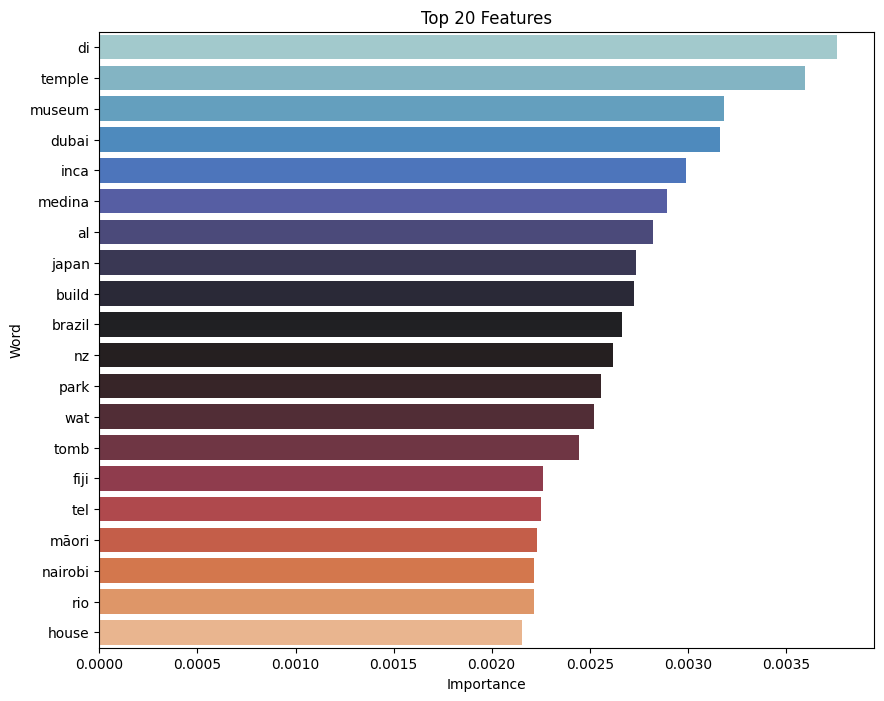

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=top_20_feats, y=top_20_feats.index, palette='icefire')
plt.title('Top 20 Features')
plt.ylabel('Word')
plt.xlabel('Importance')
plt.show()

**This model is also overfit. Interestingly, the feature importances show a lot of country-specific words, such as Japan, Brazil, Dubai, nz, and fiji. In the future, it might be a good idea to take these kinds of words out, but for the model's use-case we can leave them in for now.**


**Iteration 1 is the best model so far.**

# 3. GRADIENTBOOST

## Gradient Boost Iteration One

In [1218]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(random_state=42)

In [1219]:
evaluate_model(gb, X_train_tfidf, X_test_tfidf)

Training Accuracy: 0.7866749861342207
Testing Accuracy: 0.5167729415026338
Train and Test Accuracy Difference: 0.26990204463158696

---------------

Training F1: 0.804464004794689
Testing F1: 0.5371919203376678

---------------

                      precision    recall  f1-score   support

           Argentina       0.33      0.25      0.28        73
           Australia       0.58      0.47      0.52       252
              Brazil       0.80      0.54      0.64       127
              Canada       0.51      0.45      0.48       241
               Chile       0.31      0.25      0.28        60
               China       0.53      0.48      0.50       249
               Egypt       0.59      0.62      0.60       104
                Fiji       0.43      0.60      0.50        15
              France       0.68      0.49      0.57       245
             Germany       0.73      0.50      0.60       252
               India       0.70      0.56      0.62       255
              Israel      

While this model is also overfit, it performs much better than the Random Forest, with less variation between the train and test accuracy. However, the first iteration of MNB is the best yet.

We will try making some changes to the Gradient Boost model to see if it improves (using Count Vectorization, Oversampling, using bi-grams, and class weights)

## Gradient Boost Iteration Two- Count Vectorization

In [1220]:
# Trying Count Vectorizer to see the difference
# Vectorize the text data to be suitable for modeling
vectorizer_cv = CountVectorizer(analyzer='word', stop_words=stopwords_list, decode_error='ignore')
X_train_cv = vectorizer_cv.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_cv = vectorizer_cv.transform(X_test_preprocessed['Lemmatized'])

gb.fit(X_train_cv, y_train)
evaluate_model(gb, X_train_cv, X_test_cv)

Training Accuracy: 0.7608153078202995
Testing Accuracy: 0.5411699473246465
Train and Test Accuracy Difference: 0.21964536049565297

---------------

Training F1: 0.7806536674890038
Testing F1: 0.5665453201599471

---------------

                      precision    recall  f1-score   support

           Argentina       0.70      0.29      0.41        73
           Australia       0.53      0.57      0.55       252
              Brazil       0.74      0.52      0.61       127
              Canada       0.52      0.46      0.49       241
               Chile       0.37      0.18      0.24        60
               China       0.58      0.48      0.53       249
               Egypt       0.66      0.67      0.67       104
                Fiji       0.75      0.60      0.67        15
              France       0.67      0.54      0.60       245
             Germany       0.82      0.54      0.65       252
               India       0.71      0.56      0.63       255
              Israel     

The test accuracy has been improved, with the difference between train and test accuracy also reducing, making this the best model so far. It also has the better f1 score(weighted to accomodate for class imbalance), which makes it have the best balance of precision and accuracy.

## Gradient Boost Iteration Three - Using Class Weights to fix Class Imbalance

In [1221]:
# Compute class weights
from sklearn.utils import class_weight
import numpy as np

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
weights_dict = dict(zip(np.unique(y_train), class_weights))
weights_dict

# Use class weights dictionary to calculate sample weight (needed for MultinomialNB)
sample_weights = y_train.map(weights_dict)
sample_weights

gb.fit(X_train_tfidf,
       y_train,
       sample_weight=sample_weights)

evaluate_model(gb, X_train_tfidf, X_test_tfidf)

Training Accuracy: 0.7844564614531336
Testing Accuracy: 0.5206542833379539
Train and Test Accuracy Difference: 0.2638021781151797

---------------

Training F1: 0.80425582848918
Testing F1: 0.5491481743066695

---------------

                      precision    recall  f1-score   support

           Argentina       0.31      0.33      0.32        73
           Australia       0.66      0.46      0.54       252
              Brazil       0.73      0.60      0.66       127
              Canada       0.60      0.44      0.51       241
               Chile       0.27      0.27      0.27        60
               China       0.68      0.45      0.54       249
               Egypt       0.61      0.64      0.63       104
                Fiji       0.40      0.53      0.46        15
              France       0.67      0.49      0.57       245
             Germany       0.77      0.53      0.63       252
               India       0.73      0.51      0.60       255
              Israel       0

## Oversampling

### Gradient Boost Iteration Four- Random Oversampling

In [1223]:
# Using Random Oversampling
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority', random_state=42)


processed = pd.DataFrame(X_train_preprocessed['Lemmatized'])
X_train_res, y_train_res = oversample.fit_resample(processed, y_train)

X_train_res = X_train_res.squeeze()

ros_tfidf = TfidfVectorizer(analyzer='word', stop_words=stopwords_list, decode_error='ignore')
X_train_ros = ros_tfidf.fit_transform(X_train_res)
X_test_ros = ros_tfidf.transform(X_test_preprocessed['Lemmatized'])


# model = GradientBoostingClassifier(random_state=42)
# Build a pipeline using the TF-IDF Vectorizer and Logistic Regression
gb.fit(X_train_ros, y_train_res)

resampled = gb.predict(X_test_ros)
train_pred= gb.predict(X_train_ros)
accuracy_score_train = accuracy_score(y_train_res, train_pred)
accuracy_score_test = accuracy_score(y_test, resampled)


print("Random Over Sampling Training Accuracy score:", accuracy_score_train)
print("Random Over Sampling Testing Accuracy score:", accuracy_score_test)
print("Train and Test Accuracy Difference:", accuracy_score_train - accuracy_score_test)


Random Over Sampling Training Accuracy score: 0.851060291060291
Random Over Sampling Testing Accuracy score: 0.5261990573884114
Train and Test Accuracy Difference: 0.3248612336718796


This is much more overfit.

### Gradient Boost Iteration Five- SMOTE

In [1224]:
from imblearn.over_sampling import SMOTE
vectorizer_smote = TfidfVectorizer()
X_train_numeric = vectorizer_smote.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_numeric = vectorizer_smote.transform(X_test_preprocessed['Lemmatized'])
# Target only minority classes for balancing
smote = SMOTE(sampling_strategy={cls: majority_class_size for cls in minority_classes}, random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train_numeric, y_train)

gb.fit(X_train_res, y_train_res)

resampled = gb.predict(X_test_numeric)
train_pred= gb.predict(X_train_res)
accuracy_score_train = accuracy_score(y_train_res, train_pred)
accuracy_score_test = accuracy_score(y_test, resampled)

print("SMOTE Testing Accuracy score:", accuracy_score_train)
print("SMOTE Training Accuracy score:", accuracy_score_test)
print("Difference between Test and Train Accuracy:", accuracy_score_train- accuracy_score_test)

SMOTE Testing Accuracy score: 0.8169518749613888
SMOTE Training Accuracy score: 0.5084557804269476
Difference between Test and Train Accuracy: 0.30849609453444116


This is not the best model. The difference is higher than the second GB iteration

# 4. VECTOR CLASS (SVC)

## SVC Iteration One

In [1226]:
from sklearn.svm import SVC
svc = SVC(random_state=42, probability=True)
svc.fit(X_train_tfidf, y_train)
evaluate_model(svc, X_train_tfidf, X_test_tfidf)

Training Accuracy: 0.9865501941209096
Testing Accuracy: 0.5492098696978098
Train and Test Accuracy Difference: 0.4373403244230998

---------------

Training F1: 0.9856247825588891
Testing F1: 0.5301118056758048

---------------

                      precision    recall  f1-score   support

           Argentina       1.00      0.08      0.15        73
           Australia       0.39      0.69      0.50       252
              Brazil       0.92      0.38      0.54       127
              Canada       0.42      0.64      0.50       241
               Chile       1.00      0.05      0.10        60
               China       0.58      0.62      0.60       249
               Egypt       0.82      0.53      0.64       104
                Fiji       0.00      0.00      0.00        15
              France       0.62      0.61      0.61       245
             Germany       0.61      0.70      0.65       252
               India       0.62      0.63      0.62       255
              Israel      

This model is also very overfit and performs almost the same as the Random Forest one.

## SVC Iteration Two- Count Vectorization

In [1227]:
# Trying Count Vectorizer to see the difference
# Vectorize the text data to be suitable for modeling
vectorizer_cv = CountVectorizer(analyzer='word', stop_words=stopwords_list, decode_error='ignore')
X_train_cv = vectorizer_cv.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_cv = vectorizer_cv.transform(X_test_preprocessed['Lemmatized'])

svc.fit(X_train_cv, y_train)
evaluate_model(svc, X_train_cv, X_test_cv)

Training Accuracy: 0.956946755407654
Testing Accuracy: 0.4665927363459939
Train and Test Accuracy Difference: 0.49035401906166004

---------------

Training F1: 0.9546058921480152
Testing F1: 0.4448988373995546

---------------

                      precision    recall  f1-score   support

           Argentina       1.00      0.07      0.13        73
           Australia       0.36      0.62      0.45       252
              Brazil       0.89      0.31      0.47       127
              Canada       0.35      0.53      0.42       241
               Chile       1.00      0.02      0.03        60
               China       0.48      0.48      0.48       249
               Egypt       0.79      0.47      0.59       104
                Fiji       0.00      0.00      0.00        15
              France       0.48      0.52      0.50       245
             Germany       0.44      0.65      0.52       252
               India       0.51      0.56      0.53       255
              Israel      

It is also ver overfit and judging from the results, we will only tune the hyperparameters of MNB and GradientBoost

# 5. LOGISTIC REGRESSION

In [1228]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_tfidf, y_train)
evaluate_model(lr, X_train_tfidf, X_test_tfidf)

Training Accuracy: 0.824667221297837
Testing Accuracy: 0.5652897144441364
Train and Test Accuracy Difference: 0.25937750685370053

---------------

Training F1: 0.8072042031104955
Testing F1: 0.5454027840479614

---------------

                      precision    recall  f1-score   support

           Argentina       0.88      0.10      0.17        73
           Australia       0.44      0.67      0.53       252
              Brazil       0.90      0.45      0.60       127
              Canada       0.45      0.61      0.52       241
               Chile       1.00      0.08      0.15        60
               China       0.58      0.61      0.60       249
               Egypt       0.78      0.58      0.66       104
                Fiji       0.00      0.00      0.00        15
              France       0.59      0.62      0.60       245
             Germany       0.62      0.69      0.66       252
               India       0.61      0.66      0.64       255
              Israel      

This is not as bad as Random Forest and SVC. Let's see if count vectorization, which improved on the GradientBoost model, improves this one too

## Logistic Regression Iteration Two- Count Vectorization

In [1229]:
# Trying Count Vectorizer to see the difference
# Vectorize the text data to be suitable for modeling
vectorizer_cv = CountVectorizer(analyzer='word', stop_words=stopwords_list, decode_error='ignore')
X_train_cv = vectorizer_cv.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_cv = vectorizer_cv.transform(X_test_preprocessed['Lemmatized'])

lr.fit(X_train_cv, y_train)
evaluate_model(lr, X_train_cv, X_test_cv)

Training Accuracy: 0.9979894620077648
Testing Accuracy: 0.572775159412254
Train and Test Accuracy Difference: 0.42521430259551085

---------------

Training F1: 0.9979881489190341
Testing F1: 0.5654514593642909

---------------

                      precision    recall  f1-score   support

           Argentina       0.53      0.25      0.34        73
           Australia       0.49      0.58      0.53       252
              Brazil       0.74      0.53      0.62       127
              Canada       0.47      0.56      0.51       241
               Chile       0.58      0.18      0.28        60
               China       0.58      0.60      0.59       249
               Egypt       0.78      0.67      0.72       104
                Fiji       1.00      0.20      0.33        15
              France       0.59      0.58      0.59       245
             Germany       0.59      0.65      0.62       252
               India       0.64      0.64      0.64       255
              Israel      

While the test accuracy improves a bit, the model is very overfit

# 6. DECISION TREE

In [1230]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state= 42)
dt.fit(X_train_tfidf, y_train)
evaluate_model(dt, X_train_tfidf, X_test_tfidf)

Training Accuracy: 1.0
Testing Accuracy: 0.3834211255891322
Train and Test Accuracy Difference: 0.6165788744108678

---------------

Training F1: 1.0
Testing F1: 0.38239108000085115

---------------

                      precision    recall  f1-score   support

           Argentina       0.23      0.18      0.20        73
           Australia       0.36      0.40      0.38       252
              Brazil       0.62      0.44      0.52       127
              Canada       0.37      0.36      0.37       241
               Chile       0.33      0.15      0.21        60
               China       0.35      0.36      0.36       249
               Egypt       0.51      0.53      0.52       104
                Fiji       0.50      0.13      0.21        15
              France       0.41      0.40      0.41       245
             Germany       0.35      0.35      0.35       252
               India       0.45      0.41      0.43       255
              Israel       0.22      0.14      0.17    

The Decision Tree Model is very overfit, with a training accuracy of 1.0. Clearly, the Random Forest and Decision Tree which are tree-based models are overfitting a lot. 

# 7. KNEIGHBORS CLASSIFIER

In [1231]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn.fit(X_train_tfidf, y_train)
evaluate_model(knn, X_train_tfidf, X_test_tfidf)

Training Accuracy: 0.6956461453133667
Testing Accuracy: 0.4835042971998891
Train and Test Accuracy Difference: 0.21214184811347758

---------------

Training F1: 0.6975934842058451
Testing F1: 0.4858197764896338

---------------

                      precision    recall  f1-score   support

           Argentina       0.19      0.33      0.24        73
           Australia       0.31      0.58      0.40       252
              Brazil       0.36      0.54      0.43       127
              Canada       0.34      0.52      0.41       241
               Chile       0.25      0.20      0.22        60
               China       0.44      0.53      0.48       249
               Egypt       0.58      0.66      0.62       104
                Fiji       0.31      0.27      0.29        15
              France       0.52      0.51      0.51       245
             Germany       0.56      0.47      0.51       252
               India       0.62      0.51      0.56       255
              Israel     

While this model is also less overfit (0.22 difference between train and test accuracies), its accuracy is lower than the second iteration of GradientBoost, making GradientBoost still the best option. Its F1 score is also much lower.

In [1295]:
# Trying Count Vectorizer to see the difference
# Vectorize the text data to be suitable for modeling
vectorizer_cv = CountVectorizer(analyzer='word', stop_words=stopwords_list, decode_error='ignore')
X_train_cv = vectorizer_cv.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_cv = vectorizer_cv.transform(X_test_preprocessed['Lemmatized'])

knn.fit(X_train_cv, y_train)
evaluate_model(knn, X_train_cv, X_test_cv)

Training Accuracy: 0.3103854686633389
Testing Accuracy: 0.09453839756029941
Train and Test Accuracy Difference: 0.21584707110303947

---------------

Training F1: 0.3038122065452747
Testing F1: 0.06070338989647092

---------------

                      precision    recall  f1-score   support

           Argentina       0.15      0.03      0.05        73
           Australia       0.08      0.56      0.14       252
              Brazil       0.08      0.02      0.04       127
              Canada       0.16      0.02      0.04       241
               Chile       0.33      0.02      0.03        60
               China       0.13      0.03      0.05       249
               Egypt       1.00      0.04      0.07       104
                Fiji       0.00      0.00      0.00        15
              France       0.25      0.01      0.02       245
             Germany       0.25      0.01      0.02       252
               India       0.47      0.03      0.06       255
              Israel   

Both accuracies are very low and the model performs very poorly. This is the worst performance

Based on all these results, we will only try to tune the MNB and GradientBoost Models.
Scoring will be **weighted**- Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance, which we have in the dataset.

# Hyper Parameter Tuning- Tuning MNB and GradientBoost Models

## Tuning MNB

In [1234]:
# Commented out because it takes too long to run. Obtained parameters have been given below
# from sklearn.model_selection import GridSearchCV

# params_mn = {
#     'alpha':[.001, .01, .05, .1, .2, .4, .6, .8, 1],
#     'fit_prior': [True, False]
# }
# nb_gridsearch = GridSearchCV(estimator = nb, param_grid=params_mn, cv = 5, scoring='f1_weighted')
# nb_gridsearch.fit(X_train_tfidf, y_train)

In [1235]:
# # Report best score and parameters
# print(f"Best score: {nb_gridsearch.best_score_:.3f}")
# print(f"Best parameters: {nb_gridsearch.best_params_}")

Let's refit it again with the new parameters and get the new test and train accuracies- Best parameters: {'alpha': 0.05, 'fit_prior': False}

In [1236]:
nb = MultinomialNB(alpha=0.05, fit_prior=False)
nb.fit(X_train_tfidf, y_train)
evaluate_model(nb, X_train_tfidf, X_test_tfidf)

Training Accuracy: 0.9884914032168608
Testing Accuracy: 0.6165788744108678
Train and Test Accuracy Difference: 0.371912528805993

---------------

Training F1: 0.9884992190487341
Testing F1: 0.6128367682930148

---------------

                      precision    recall  f1-score   support

           Argentina       0.47      0.33      0.39        73
           Australia       0.51      0.63      0.56       252
              Brazil       0.73      0.63      0.68       127
              Canada       0.47      0.59      0.52       241
               Chile       0.67      0.27      0.38        60
               China       0.65      0.66      0.66       249
               Egypt       0.78      0.73      0.75       104
                Fiji       1.00      0.27      0.42        15
              France       0.63      0.61      0.62       245
             Germany       0.69      0.71      0.70       252
               India       0.73      0.64      0.68       255
              Israel       

While the test accuracy increases, the model is now very overfit compared to the first iteration

## Tuning GradientBoost Iteration Two

In [1237]:
# Commented out because it was taking too long to run, but the best parameters were obtained as indicated in the markdown below.
# Since we were only trying to tune the number of estimators, we will try with 50 below and see the difference
# param_grid_gb = {
#     'n_estimators': [50, 100]
# }
# grid_search_gb =GridSearchCV(estimator = gb,param_grid=param_grid_gb, scoring='f1_weighted' )
# grid_search_gb.fit(X_train_cv, y_train)

In [1238]:
gb_50 = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_50.fit(X_train_cv, y_train)
evaluate_model(gb_50, X_train_cv, X_test_cv)

Training Accuracy: 0.6460759844703272
Testing Accuracy: 0.4976434710285556
Train and Test Accuracy Difference: 0.1484325134417716

---------------

Training F1: 0.6856463180001228
Testing F1: 0.5371876347599285

---------------

                      precision    recall  f1-score   support

           Argentina       0.74      0.27      0.40        73
           Australia       0.60      0.48      0.53       252
              Brazil       0.88      0.48      0.62       127
              Canada       0.50      0.45      0.47       241
               Chile       0.42      0.18      0.26        60
               China       0.56      0.44      0.49       249
               Egypt       0.66      0.62      0.64       104
                Fiji       0.60      0.60      0.60        15
              France       0.65      0.47      0.54       245
             Germany       0.82      0.48      0.60       252
               India       0.68      0.55      0.61       255
              Israel      

While the model is less overfit, the accuracies have reduced by a lot

Trying with 200 n_estimators below

In [1239]:
gb_200 = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_200.fit(X_train_cv, y_train)
evaluate_model(gb_200, X_train_cv, X_test_cv)

Training Accuracy: 0.8598863006100943
Testing Accuracy: 0.5719434433046854
Train and Test Accuracy Difference: 0.2879428573054089

---------------

Training F1: 0.8680622642837107
Testing F1: 0.5876688345753117

---------------

                      precision    recall  f1-score   support

           Argentina       0.70      0.29      0.41        73
           Australia       0.52      0.60      0.55       252
              Brazil       0.76      0.53      0.62       127
              Canada       0.53      0.54      0.54       241
               Chile       0.34      0.20      0.25        60
               China       0.61      0.56      0.58       249
               Egypt       0.71      0.68      0.70       104
                Fiji       0.75      0.60      0.67        15
              France       0.66      0.57      0.61       245
             Germany       0.80      0.58      0.67       252
               India       0.73      0.60      0.66       255
              Israel      

The accuracies have increased but the model is more overfit. Ultimately, the best performing model is the second iteration of the GradientBoost model- With Count Vectorization.
**Reasoning**
- The model achieves the best balance between test and train accuracy, without compromising on the values themselves.
- Compared to the other contender(the first iteration of MNB), it has the best F1 score, which means that it has the best balance of precision and accuracy, which is important for the destination recommendations.

As a final check, let's remove the country names by adding them to the stopwords list to see how this impacts the model. The precense of these words in the top feature names means that they could be making the models biased.

In [1279]:
new_stopwords = stopwords_list + ['Argentina', 'Australia', 'Brazil', 'Canada', 'Chile', 'China',
       'Egypt', 'Fiji', 'France', 'Germany', 'India', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kenya', 'Mexico', 'Morocco', 'New Zealand',
       'Peru', 'South Africa', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United States']



## Final Model

In [1280]:
vectorizer_cv = CountVectorizer(analyzer='word', stop_words=new_stopwords, decode_error='ignore')
X_train_cv = vectorizer_cv.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_cv = vectorizer_cv.transform(X_test_preprocessed['Lemmatized'])

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_cv, y_train)
evaluate_model(gb, X_train_cv, X_test_cv)

Training Accuracy: 0.7608153078202995
Testing Accuracy: 0.5411699473246465
Train and Test Accuracy Difference: 0.21964536049565297

---------------

Training F1: 0.7806536674890038
Testing F1: 0.5665453201599471

---------------

                      precision    recall  f1-score   support

           Argentina       0.70      0.29      0.41        73
           Australia       0.53      0.57      0.55       252
              Brazil       0.74      0.52      0.61       127
              Canada       0.52      0.46      0.49       241
               Chile       0.37      0.18      0.24        60
               China       0.58      0.48      0.53       249
               Egypt       0.66      0.67      0.67       104
                Fiji       0.75      0.60      0.67        15
              France       0.67      0.54      0.60       245
             Germany       0.82      0.54      0.65       252
               India       0.71      0.56      0.63       255
              Israel     

This does not make a difference

# TEST OUT MODEL

Ultimately, this model should tell people where they should travel based on what they want to do when on vacation. Let's take a look at some of the sample predictions this model would give them

In [1242]:
def preprocess_text(text):
    """
    Input raw text.
    Return preprocessed text.
    """
    nlp = spacy.load('en_core_web_sm')
    preprocessed = nlp(text)

    preprocessed = text.lower()
    preprocessed = re.sub('[%s]' % re.escape(string.punctuation), '', preprocessed)
    preprocessed = re.sub('\w*\d\w*','', preprocessed)

    
    return [preprocessed]

In [1243]:
vectorizer_final = CountVectorizer(analyzer='word', stop_words=new_stopwords, decode_error='ignore')

In [1244]:
X_train_final = vectorizer_final.fit_transform(X_train_preprocessed['Lemmatized'])
X_test_final = vectorizer_final.transform(X_test_preprocessed['Lemmatized'])

In [1245]:
final_model = GradientBoostingClassifier(random_state=42)
final_model.fit(X_train_final, y_train)

GradientBoostingClassifier(random_state=42)

In [1246]:
y_preds_test = final_model.predict(X_test_final)

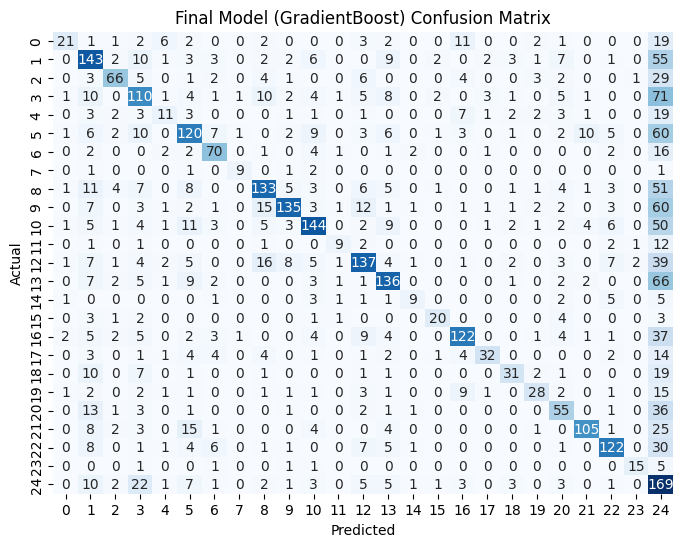

In [1347]:
 # Confusion Matrix
cm = confusion_matrix(y_test, y_preds_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Model (GradientBoost) Confusion Matrix')
plt.show()

In [1247]:
accuracy_score(y_test, y_preds_test)

0.5411699473246465

In [1248]:
raw_text = 'Best place for hiking and snorkeling'
preprocessed_text = preprocess_text(raw_text)
preprocessed_text

['best place for hiking and snorkeling']

In [1249]:
final_model.predict(vectorizer_final.transform(preprocessed_text))

array(['Mexico'], dtype=object)

In [1250]:
preprocessed2 = preprocess_text('Where can I go hiking and swimming in the ocean?')
print(preprocessed2)
final_model.predict(vectorizer_final.transform(preprocessed2))

['where can i go hiking and swimming in the ocean']


array(['Australia'], dtype=object)

In [1251]:
preprocessed3 = preprocess_text('Which is the best place to do Wine tastings, long walks on the beach and dinners on the beach')
print(preprocessed3)
final_model.predict(vectorizer_final.transform(preprocessed3))

['which is the best place to do wine tastings long walks on the beach and dinners on the beach']


array(['South Africa'], dtype=object)

In [1252]:
preprocessed4 = preprocess_text('Where can I do yoga on the beach?')
print(preprocessed4)
final_model.predict(vectorizer_final.transform(preprocessed4))

['where can i do yoga on the beach']


array(['United States'], dtype=object)

In [1253]:
preprocessed5 = preprocess_text('Where can I visit historical museums?')
print(preprocessed5)
final_model.predict(vectorizer_final.transform(preprocessed5))

['where can i visit historical museums']


array(['United States'], dtype=object)

In [1254]:
preprocessed6 = preprocess_text('Where can I see alpine meadows and glaciers?')
print(preprocessed6)
final_model.predict(vectorizer_final.transform(preprocessed6))

['where can i see alpine meadows and glaciers']


array(['Chile'], dtype=object)

In [1255]:
preprocessed7 = preprocess_text('Where can I see alpine meadows, rivers, lakes, and glaciers?')
print(preprocessed7)
final_model.predict(vectorizer_final.transform(preprocessed7))

['where can i see alpine meadows rivers lakes and glaciers']


array(['Chile'], dtype=object)

## Make This Process Into a Pipeline for Creating the Dash App

In [ ]:
# Use OOP to get preprocessing steps into a pipeline
class PreprocessText(TransformerMixin):
    
    def __init__(self):
        self = self
    
    def fit(self, X, y=None, **fit_params):
        return self
        
    def transform(self, X, **transform_params):
        try:
            X = pd.DataFrame(X, columns=['Description'])
            X['Cleaned'] = X['Description'].apply(lambda x: x.lower())
            X['Cleaned'] = X['Cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
            X['Cleaned'] = X['Cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
            X['Lemmatized'] = X['Cleaned'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(lemmatized(x)) if (token.is_stop==False)]))
            
            X = X['Lemmatized']
        except:
            pass
        return X
    

In [1257]:
# Test preprocessing class
prep = PreprocessText()
prep.transform(X_train)

119      watering hole attract animal include elephant ...
9709     museum offer good overview natural cultural hi...
11414    form early   desire preserve memory story poss...
4584     nature sanctuary daytrip reach mumbais city li...
12856    small plantation produce almostorganic shadegr...
                               ...                        
11290    build   shimmer tintopped house worship old ch...
11972      brother oscar marius dufresne commission bea...
5396     ao wai lovely beach far remove reality   ao thian
860      amenemhat   governor oryx tomb large possibly ...
15804      south peppermint bay stop foodie grandvewe c...
Name: Lemmatized, Length: 14424, dtype: object

In [1258]:
pipe = Pipeline(steps=[
                ('TextPreprocessor', PreprocessText()),
                ('CountVectorizer', CountVectorizer(analyzer='word',
                                                    stop_words=new_stopwords,
                                                    decode_error='ignore')),
                ('GradientBoost', GradientBoostingClassifier(n_estimators=100, random_state=42))])

In [1259]:
set_config(display='diagram')

In [1260]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('TextPreprocessor',
                 <__main__.PreprocessText object at 0x000002363F5F7990>),
                ('CountVectorizer',
                 CountVectorizer(decode_error='ignore',
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('GradientBoost', GradientBoostingClassifier(random_state=42))])

In [1261]:
def evaluate_pipe(pipe, X_train, X_test):
    y_preds_train = pipe.predict(X_train)
    y_preds_test = pipe.predict(X_test)

    print('Training Accuracy:', accuracy_score(y_train, y_preds_train))
    print('Testing Accuracy:', accuracy_score(y_test, y_preds_test))
    print('\n---------------\n')
    print('Training F1:', f1_score(y_train, y_preds_train, average='weighted'))
    print('Testing F1:', f1_score(y_test, y_preds_test, average='weighted'))
    print('\n---------------\n')
    print(classification_report(y_test, y_preds_test))

In [1262]:
pipe.predict(['I want to go snorkelling and tan on the beach'])

array(['United States'], dtype=object)

In [1263]:
pipe.predict(['See alpine mountains and rivers'])

array(['Chile'], dtype=object)

In [1264]:
pipe.predict(['castle'])

array(['Japan'], dtype=object)

In [1265]:
pipe.predict(['church'])

array(['Italy'], dtype=object)

In [1266]:
pipe.predict(['World Heritage Site'])

array(['United States'], dtype=object)

In [1267]:
pipe.predict(['Visit Art Galleries'])

array(['United States'], dtype=object)

In [1275]:
pipe.predict(['elephant'])

array(['United States'], dtype=object)

In [1299]:
pipe.predict(['I want to travel to travel to Africa'])

array(['South Africa'], dtype=object)

In [1268]:
evaluate_pipe(pipe, X_train, X_test)

Training Accuracy: 0.7608153078202995
Testing Accuracy: 0.5411699473246465

---------------

Training F1: 0.7806536674890038
Testing F1: 0.5665453201599471

---------------

                      precision    recall  f1-score   support

           Argentina       0.70      0.29      0.41        73
           Australia       0.53      0.57      0.55       252
              Brazil       0.74      0.52      0.61       127
              Canada       0.52      0.46      0.49       241
               Chile       0.37      0.18      0.24        60
               China       0.58      0.48      0.53       249
               Egypt       0.66      0.67      0.67       104
                Fiji       0.75      0.60      0.67        15
              France       0.67      0.54      0.60       245
             Germany       0.82      0.54      0.65       252
               India       0.71      0.56      0.63       255
              Israel       0.56      0.31      0.40        29
               Ital

# Get Top 2 Predictions from The Best Model

It would be good for the user to get a second prediction if they have already been to the first predicted place

In [1269]:
probas = pipe.predict_proba(['I want to visit art galleries'])
probas

array([[1.05856793e-02, 8.16741921e-02, 2.82356775e-02, 8.33460724e-02,
        8.19428261e-03, 7.11872651e-02, 1.88296474e-02, 3.24438287e-06,
        7.72256275e-02, 7.77522955e-02, 7.34315294e-02, 2.90163387e-04,
        6.64141476e-02, 7.55705189e-02, 4.37842090e-04, 1.88321819e-04,
        6.46980212e-02, 9.05691483e-03, 1.48780135e-02, 9.85003079e-03,
        3.93960348e-02, 3.82745745e-02, 6.15134334e-02, 4.47723238e-05,
        8.89216976e-02]])

In [1270]:
classes = pipe.classes_
classes

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'Chile', 'China',
       'Egypt', 'Fiji', 'France', 'Germany', 'India', 'Israel', 'Italy',
       'Japan', 'Jordan', 'Kenya', 'Mexico', 'Morocco', 'New Zealand',
       'Peru', 'South Africa', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United States'], dtype=object)

In [1271]:
# First Prediction
classes[probas.argmax()]

'United States'

In [1272]:
# Second Prediction
classes[np.argsort(probas)[:, 10]][0]

'Egypt'

# Visualization Comparison of The Tested Models

We will visualize the Train Accuracy, Test Accuracy, Difference between accuracies, and F1 Scores of the best performing iterations of all the models.

In [ ]:

models = ['MNB', 'RF', 'GB', 'SVC', 'LR', 'DT', 'KNN']
train_accuracies = [0.74, 1.00, 0.76, 0.99, 0.82, 1.00, 0.70]
test_accuracies= [0.52, 0.51, 0.54, 0.55, 0.57, 0.38, 0.48]

f1_scores= [0.48, 0.51, 0.57, 0.44, 0.54, 0.38, 0.49 ]
models_comparison =  pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'F1 Score': f1_scores
})
models_comparison['Accuracies Difference'] = models_comparison['Train Accuracy']- models_comparison['Test Accuracy']
models_comparison

,Model,Train Accuracy,Test Accuracy,F1 Score,Accuracies Difference
0,MNB,0.74,0.52,0.48,0.22
1,RF,1.00,0.51,0.51,0.49
2,GB,0.76,0.54,0.57,0.22
3,SVC,0.99,0.55,0.44,0.44
4,LR,0.82,0.57,0.54,0.25
5,DT,1.00,0.38,0.38,0.62
6,KNN,0.70,0.48,0.49,0.22


## Accuracies and F1 Score

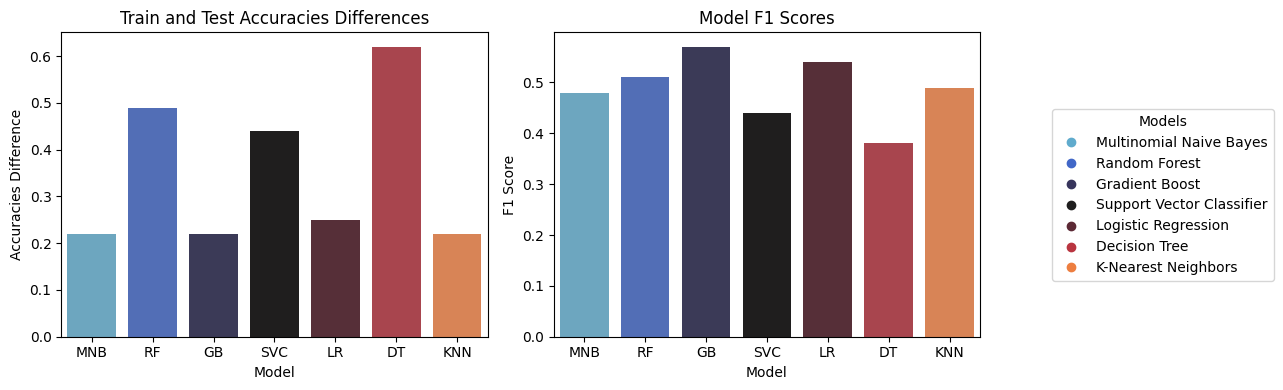

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a mapping between abbreviations and full names
model_full_names = {
    'MNB': 'Multinomial Naive Bayes',
    'RF': 'Random Forest',
    'GB': 'Gradient Boost',
    'SVC': 'Support Vector Classifier',
    'LR': 'Logistic Regression',
    'DT': 'Decision Tree',
    'KNN': 'K-Nearest Neighbors'
}

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

# Plot 1: Train and Test Accuracies Differences
sns.barplot(x='Model', y='Accuracies Difference', ax=ax[0], data=models_comparison, palette='icefire')
ax[0].set_title('Train and Test Accuracies Differences')

# Plot 2: F1 Scores
sns.barplot(x='Model', y='F1 Score', ax=ax[1], data=models_comparison, palette='icefire')
ax[1].set_title('Model F1 Scores')

# Add a legend with full model names
handles = [
    plt.Line2D([0], [0], color=sns.color_palette('icefire', len(models_comparison))[_], marker='o', linestyle='', label=model_full_names[abbr])
    for _, abbr in enumerate(models_comparison['Model'].unique())
]

fig.legend(handles=handles, title="Models", bbox_to_anchor=(1.05, 0.5), loc='center left', frameon=True)

# Adjust layout
plt.tight_layout()
plt.show()


# Conclusion

The final model is the GradientBoost Classifier, which can predict a destination with 54% accuracy and a 57% F1 score (Iteration two of the GB Classifier in this notebook with Count Vectorization). The higher the F1 score, the better is the performance of our model, and this model has the best F1 score, and the least variation between the test and train accuracies, making it the least overfit. It will generalize best to unseen data.

The data put into this model is lowercased, punctuations removed, lemmatized, and with stop words removed.

## Model Fit and Score

Accuracy and F1 score were used for model evaluation. Since there are 25 classes, it is important for the model to be accurate. However, the F1 score is also an important consideration since there is class imbalance in the dataset, to account for the false positives and false negatives. The weighed F1 score was considered, given the class imbalance and to achieve a good balance between precision and accuracy rather than focusing on the accuracy alone. 

The selected model is the least overfit while providing one of the highest accuracies compared to the rest of the models. Considering that there are 25 classes, the model does do a good job at predicting, but would need a lot of improvement and more data input for better training. 

The final model has the following training and testing accuracy and F1 scores:
- Testing Accuracy score: 0.76 | F1 Score: 0.78
- Testing Accuracy score: 0.54 | F1 Score: 0.57

Many iterations were tried for all the models that we attempted (MNB, RandomForest, GradientBoost, Decision Trees, Logistic Regression, SVC, KNneighbors), with efforts to oversample (Random Oversampling and smote), use class weights to deal with class imbalance, use bi-grams to mode, contrast TF-IDF vectorization vs CountVectorization, adding the country names to the stop words list, and hyperparameter tuning. 

# Recommendations
- Get more data- more countries, more descriptions. With a larger pool of text, travel recommendations will be more accurate.
- Balance data well right from scraping. This will avoid having some classes that have too much data which could be making the model biased to countries like the United States by defaulting to this as the recommended destination when there is no country with the provided interests/activities.

# Deployment